#**Librerías y configuraciones**

In [1]:
import os
import glob
from IPython.display import display, Image, clear_output
import matplotlib.pyplot as plt

In [2]:
import cv2
import numpy as np
import pandas as pd


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import math

In [4]:
import random

In [5]:
# from IPython.display import clear_output
# display.clear_output()

In [6]:
# Para descargar el dataset

!pip install roboflow
from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


Chequeamos si estamos usando GPU

In [7]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [8]:
HOME = os.getcwd()

In [9]:
print(HOME)

/content


In [10]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 22.2 MB/s eta 0:00:00


Chequear si YOLO está instalado

In [11]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [12]:
ultralytics.checks()

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.8/107.7 GB disk)


# Yolo

In [13]:
from ultralytics import YOLO

Descomentar el que se desea usar

In [14]:
# model = YOLO("yolo11l.pt")

In [15]:
# model = YOLO("yolo11s.pt")

# **Dataset**

**Importamos American Sign Language Alphabets Dataset de Roboflow**

El dataset se encuentra en este link https://universe.roboflow.com/david-lee-d0rhs/american-sign-language-letters

In [14]:
# import shutil

# # Ruta de la carpeta a eliminar
# carpeta = "/content/runs"

# # Eliminar la carpeta y su contenido
# shutil.rmtree(carpeta)

In [15]:
# !rm -rf /content/runs

In [16]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

rf = Roboflow(api_key="jr9B0k6abSGwqH8TD8Am")
project = rf.workspace("david-lee-d0rhs").project("american-sign-language-letters")
dataset = project.version(1).download("yolov11")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to American-Sign-Language-Letters-1 in yolov11:: 100%|██████████| 3468/3468 [00:01<00:00, 2119.66it/s]


In [17]:
# Ruta principal del dataset
dataset_path = "/content/datasets/American-Sign-Language-Letters-1"

In [18]:
# Función para contar las imágenes por clase en el conjunto de entrenamiento (train)
def count_images_in_train(dataset_path):
    class_counts = {}
    # Ruta para el conjunto de entrenamiento
    train_path = os.path.join(dataset_path, 'train', 'images')

    # Recorrer los archivos en la carpeta 'images'
    for filename in os.listdir(train_path):
        # Verificar que el archivo sea una imagen (en este caso .jpg o .png)
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Extraer la clase del nombre del archivo, asumiendo que el prefijo es la clase
            # Ejemplo: "B19_jpg.rf.69527cc1f34d694cc04e55db80ed9b1a.jpg"
            class_label = filename.split('_')[0]  # Extrae 'B19' de 'B19_jpg.rf...'
            class_label = filename[0]  # Extrae solo la letra (por ejemplo, 'B' de 'B20')

            # Contar las imágenes por clase
            class_counts[class_label] = class_counts.get(class_label, 0) + 1
    return class_counts

In [19]:
# Contar las imágenes por clase en el conjunto de entrenamiento
class_counts = count_images_in_train(dataset_path)
print(class_counts)
len(class_counts)

{'E': 63, 'Q': 60, 'G': 60, 'N': 60, 'A': 69, 'U': 48, 'J': 78, 'M': 51, 'H': 51, 'D': 63, 'K': 51, 'R': 48, 'L': 72, 'Y': 48, 'W': 57, 'Z': 66, 'C': 54, 'O': 54, 'F': 60, 'I': 78, 'V': 57, 'X': 63, 'S': 69, 'B': 39, 'T': 42, 'P': 51}


26

In [20]:
# Visualizar los resultados
letters = list(class_counts.keys())
counts = list(class_counts.values())

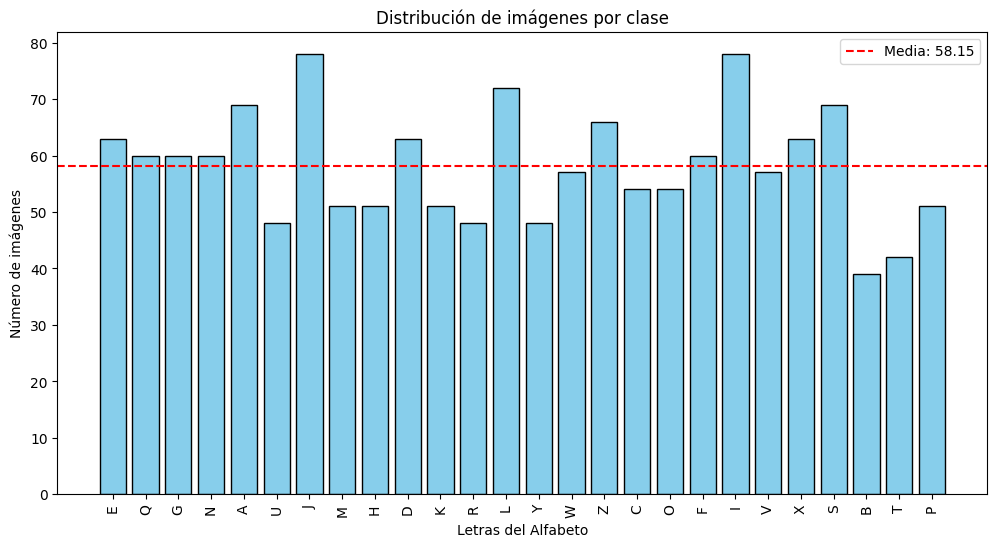

In [21]:
# Calcular la media
mean_value = np.mean(counts)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(letters, counts, color='skyblue', edgecolor='black')
plt.axhline(mean_value, color='red', linestyle='--', linewidth=1.5, label=f'Media: {mean_value:.2f}')
plt.xlabel('Letras del Alfabeto')
plt.ylabel('Número de imágenes')
plt.title('Distribución de imágenes por clase')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [22]:
import pandas as pd

# Crear un DataFrame con los resultados
df = pd.DataFrame(list(class_counts.items()), columns=['Letra', 'Número de Imágenes'])

# Calcular el porcentaje de imágenes por clase
total_images = df['Número de Imágenes'].sum()
df['Porcentaje'] = (df['Número de Imágenes'] / total_images) * 100

# Show the dataframe directly.
display(df) # This shows the dataframe in the notebook


# Mostrar el DataFrame en la salida
print(df)

Letra  Número de Imágenes  Porcentaje
0      E                  63    4.166667
1      Q                  60    3.968254
2      G                  60    3.968254
3      N                  60    3.968254
4      A                  69    4.563492
5      U                  48    3.174603
6      J                  78    5.158730
7      M                  51    3.373016
8      H                  51    3.373016
9      D                  63    4.166667
10     K                  51    3.373016
11     R                  48    3.174603
12     L                  72    4.761905
13     Y                  48    3.174603
14     W                  57    3.769841
15     Z                  66    4.365079
16     C                  54    3.571429
17     O                  54    3.571429
18     F                  60    3.968254
19     I                  78    5.158730
20     V                  57    3.769841
21     X                  63    4.166667
22     S                  69    4.563492
23     B                  39    2.579365
24     T                  42    2.777778
25     P                  51    3.373016

   Letra  Número de Imágenes  Porcentaje
0      E                  63    4.166667
1      Q                  60    3.968254
2      G                  60    3.968254
3      N                  60    3.968254
4      A                  69    4.563492
5      U                  48    3.174603
6      J                  78    5.158730
7      M                  51    3.373016
8      H                  51    3.373016
9      D                  63    4.166667
10     K                  51    3.373016
11     R                  48    3.174603
12     L                  72    4.761905
13     Y                  48    3.174603
14     W                  57    3.769841
15     Z                  66    4.365079
16     C                  54    3.571429
17     O                  54    3.571429
18     F                  60    3.968254
19     I                  78    5.158730
20     V                  57    3.769841
21     X                  63    4.166667
22     S                  69    4.563492
23     B        

In [23]:
# Ordenar por letra (alfabéticamente)
df['Letra'] = df['Letra'].apply(lambda x: x[0])  # Asegurarse de que solo se toma la letra
df = df.sort_values(by='Letra').reset_index(drop=True)

# Mostrar el DataFrame en la salida
print(df)


   Letra  Número de Imágenes  Porcentaje
0      A                  69    4.563492
1      B                  39    2.579365
2      C                  54    3.571429
3      D                  63    4.166667
4      E                  63    4.166667
5      F                  60    3.968254
6      G                  60    3.968254
7      H                  51    3.373016
8      I                  78    5.158730
9      J                  78    5.158730
10     K                  51    3.373016
11     L                  72    4.761905
12     M                  51    3.373016
13     N                  60    3.968254
14     O                  54    3.571429
15     P                  51    3.373016
16     Q                  60    3.968254
17     R                  48    3.174603
18     S                  69    4.563492
19     T                  42    2.777778
20     U                  48    3.174603
21     V                  57    3.769841
22     W                  57    3.769841
23     X        

In [24]:
# # Guardar el DataFrame como un archivo CSV
# df.to_csv('/content/dataset.csv', index=False)

# # Generar un enlace para descargar el archivo CSV
# from google.colab import files
# files.download('/content/dataset.csv')

In [25]:
# Calcular el porcentaje de imágenes por clase
total_images = df['Número de Imágenes'].sum()
df['Porcentaje'] = (df['Número de Imágenes'] / total_images) * 100

# Ordenar por letra (alfabéticamente)
df['Letra'] = df['Letra'].apply(lambda x: x[0])  # Asegurarse de que solo se toma la letra
df = df.sort_values(by='Letra').reset_index(drop=True)

# Filtrar clases con un porcentaje menor a 3.5
classes_below_3_5 = df[df['Porcentaje'] < 3.5]

# Contar el número de clases con porcentaje menor a 3.5
num_classes_below_3_5 = classes_below_3_5.shape[0]
num_classes_below_3_5

9

In [26]:
# Verificar si el dataset está balanceado
total_images = sum(counts)
average = total_images / len(class_counts)
print(f"Total de imágenes: {total_images}")
print(f"Promedio por clase: {average}")

Total de imágenes: 1512
Promedio por clase: 58.15384615384615


En general, las clases están bastante equilibradas. Aquí algunos puntos clave:

Las clases con un porcentaje menor a 3.5% son B (2.58%), T (2.78%) y C (3.57%). Esto indica que hay algunas clases que tienen menos representación que otras, pero la diferencia no es tan drástica.
Las clases que están por encima del 3.5% tienen una distribución más uniforme, con valores que oscilan entre el 3.37% y el 5.16%, lo que indica que el dataset está razonablemente equilibrado.

Reliazaremos el 1er desarrollo con estos datos y luego veremos si es necesario relizar data argumentation

# Carpetas ZIP

Estas carpetas contienen los datos de entrenamiento se cargan una vez ejecutado el código de los modelos.

In [27]:
import zipfile


# Ruta de los archivos ZIP
zip1_path = "/content/run-yolo11s.zip"
zip2_path = "/content/run-yolo11l.zip"

# Ruta donde descomprimirás los archivos
output_dir1 = "/content/run-yolo11s"
output_dir2 = "/content/run-yolo11l"

# # Descomprimir el primer archivo
# with zipfile.ZipFile(zip1_path, 'r') as zip_ref:
#     zip_ref.extractall(output_dir1)

# Descomprimir el segundo archivo
with zipfile.ZipFile(zip2_path, 'r') as zip_ref:
    zip_ref.extractall(output_dir2)

# Mostrar contenido descomprimido
print("Contenido de run-yolo11s:")
print(os.listdir(output_dir1))
print("\nContenido de yolo11-80epochs:")
print(os.listdir(output_dir2))


Contenido de run-yolo11s:


FileNotFoundError: [Errno 2] No such file or directory: '/content/run-yolo11s'

Código para descargar carpetas

In [41]:
# from google.colab import files
# import shutil

# # Descarga carpeta
# folder_to_download = '/content/runs'

# # Crea un archivo ZIP de la carpeta
# shutil.make_archive('run-yolo11s', 'zip', folder_to_download)

# # Descarga el archivo ZIP
# files.download('run-yolo11s.zip')


# Balanceo de clases


In [ ]:
!pip install albumentations opencv-python tqdm


In [ ]:
import os
import cv2
import pandas as pd
import albumentations as A
from albumentations.core.bbox_utils import convert_bboxes_to_albumentations, convert_bboxes_from_albumentations
from albumentations.pytorch import ToTensorV2
import random
from tqdm import tqdm

In [ ]:
# Rutas de las carpetas
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"


In [ ]:
# Leer nombres de archivos y agrupar por clase
image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg") or f.endswith(".png")]
label_files = [f.replace(".txt", "").replace(".jpg", "").replace(".png", "") for f in os.listdir(labels_path)]


In [ ]:
# Crear DataFrame para analizar las clases
data = []
for image_file in image_files:
    label = os.path.basename(image_file)[0]  # La primera letra indica la clase
    data.append({"class": label, "image": image_file})

df = pd.DataFrame(data)

# Contar imágenes por clase
class_counts = df["class"].value_counts()

In [ ]:
# Configurar aumento de datos
augmenter = A.Compose([
    A.RandomBrightnessContrast(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.05, scale_limit=0.05, rotate_limit=15, p=0.5),
    A.Blur(blur_limit=3, p=0.2),
    A.Resize(224, 224),
], bbox_params=A.BboxParams(format="yolo", label_fields=["class_labels"]))


### viejo

In [ ]:
# Balancear datos a 78 imágenes por clase
for label in tqdm(class_counts.index):
    # Filtrar imágenes de la clase actual
    label_images = df[df["class"] == label]
    n_images = len(label_images)

    # Si ya tiene 78 imágenes, no hacemos nada
    if n_images == 78:
        continue

    # Submuestreo si tiene más de 78 imágenes
    # if n_images > 78:
    #     label_images = label_images.sample(n=78, random_state=42)

    # Si tiene menos de 78 imágenes, aumentar datos
    elif n_images < 78:
        needed_images = 78 - n_images
        for _ in range(needed_images):
            random_row = label_images.sample(n=1).iloc[0]
            image_name = random_row["image"]

            # Cargar imagen y bounding boxes
            image_path = os.path.join(images_path, image_name)
            bbox_path = os.path.join(labels_path, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))

            image = cv2.imread(image_path)
            with open(bbox_path, "r") as f:
                original_bboxes = [list(map(float, line.strip().split())) for line in f]

            # Convertir bounding boxes al formato YOLO normalizado a [0,1]
            image_height, image_width, _ = image.shape
            yolo_bboxes = [
                [
                    bbox[1],  # x_center
                    bbox[2],  # y_center
                    bbox[3],  # width
                    bbox[4],  # height
                ]
                for bbox in original_bboxes
            ]

            # Aplicar aumento
            augmented = augmenter(image=image, bboxes=yolo_bboxes, class_labels=["object"] * len(original_bboxes))

            # Guardar nueva imagen y bounding box
            augmented_image = augmented["image"]
            augmented_bboxes = [
                [
                    bbox[0],  # x_center
                    bbox[1],  # y_center
                    bbox[2],  # width
                    bbox[3],  # height
                ]
                for bbox in augmented["bboxes"]
            ]

            # Guardar con un nuevo nombre
            new_image_name = f"{label}{random.randint(1000, 9999)}.jpg"
            new_label_name = new_image_name.replace(".jpg", ".txt").replace(".png", ".txt")

            # Guardar imagen
            cv2.imwrite(os.path.join(images_path, new_image_name), augmented_image)

            # Guardar coordenadas
            with open(os.path.join(labels_path, new_label_name), "w") as f:
                for bbox in augmented_bboxes:
                    f.write(" ".join(map(str, bbox)) + "\n")


### nuevo

In [ ]:
# Balancear datos a 78 imágenes por clase
for label in tqdm(class_counts.index):
    # Filtrar imágenes de la clase actual
    label_images = df[df["class"] == label]
    n_images = len(label_images)

    # Si ya tiene 78 imágenes, no hacemos nada
    if n_images == 78:
        continue

    # Submuestreo si tiene más de 78 imágenes
    if n_images > 78:
        label_images = label_images.sample(n=78, random_state=42)

    # Si tiene menos de 78 imágenes, aumentar datos
    elif n_images < 78:
        needed_images = 78 - n_images
        for _ in range(needed_images):
            # Seleccionar aleatoriamente una imagen existente
            random_row = label_images.sample(n=1).iloc[0]
            image_name = random_row["image"]

            # Cargar imagen y bounding boxes
            image_path = os.path.join(images_path, image_name)
            bbox_path = os.path.join(labels_path, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))

            image = cv2.imread(image_path)
            with open(bbox_path, "r") as f:
                original_bboxes = [list(map(float, line.strip().split())) for line in f]

            # Convertir bounding boxes al formato YOLO normalizado a [0,1]
            image_height, image_width, _ = image.shape
            yolo_bboxes = [
                [
                    bbox[1],  # x_center
                    bbox[2],  # y_center
                    bbox[3],  # width
                    bbox[4],  # height
                ]
                for bbox in original_bboxes
            ]

            # Aplicar aumentación
            augmented = augmenter(image=image, bboxes=yolo_bboxes, class_labels=["object"] * len(original_bboxes))

            # Filtrar coordenadas duplicadas y validar
            unique_bboxes = set()
            augmented_bboxes = []
            for bbox in augmented["bboxes"]:
                if len(bbox) == 4 and all(0 <= val <= 1 for val in bbox):  # Verificar coordenadas válidas
                    bbox_tuple = tuple(bbox)  # Convertir a tupla para evitar duplicados
                    if bbox_tuple not in unique_bboxes:
                        unique_bboxes.add(bbox_tuple)
                        augmented_bboxes.append(bbox)

            # Guardar con un nuevo nombre
            new_image_name = f"{label}{random.randint(1000, 9999)}.jpg"
            new_label_name = new_image_name.replace(".jpg", ".txt").replace(".png", ".txt")

            # Guardar imagen aumentada
            cv2.imwrite(os.path.join(images_path, new_image_name), augmented["image"])

            # Guardar coordenadas en el archivo .txt
            with open(os.path.join(labels_path, new_label_name), "w") as f:
                for bbox in augmented_bboxes:
                    f.write("0 " + " ".join(map(str, bbox)) + "\n")  # Agregar clase 0 al inicio

100%|██████████| 24/24 [00:26<00:00,  1.11s/it]


In [ ]:
# Balancear datos a 78 imágenes por clase
for label in tqdm(class_counts.index):
    # Filtrar imágenes de la clase actual
    label_images = df[df["class"] == label]
    n_images = len(label_images)

    # Si ya tiene 78 imágenes, no hacemos nada
    if n_images == 78:
        continue

    # Submuestreo si tiene más de 78 imágenes
    if n_images > 78:
        label_images = label_images.sample(n=78, random_state=42)

    # Si tiene menos de 78 imágenes, aumentar datos
    elif n_images < 78:
        needed_images = 78 - n_images
        for _ in range(needed_images):
            # Seleccionar aleatoriamente una imagen existente
            random_row = label_images.sample(n=1).iloc[0]
            image_name = random_row["image"]

            # Cargar imagen y bounding boxes
            image_path = os.path.join(images_path, image_name)
            bbox_path = os.path.join(labels_path, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))

            image = cv2.imread(image_path)
            with open(bbox_path, "r") as f:
                original_bboxes = [list(map(float, line.strip().split())) for line in f]

            # Convertir bounding boxes al formato YOLO normalizado a [0,1]
            image_height, image_width, _ = image.shape
            yolo_bboxes = [
                [
                    bbox[1],  # x_center
                    bbox[2],  # y_center
                    bbox[3],  # width
                    bbox[4],  # height
                ]
                for bbox in original_bboxes
            ]

            # Aplicar aumentación
            augmented = augmenter(image=image, bboxes=yolo_bboxes, class_labels=["object"] * len(original_bboxes))

            # Filtrar coordenadas duplicadas y validar
            unique_bboxes = set()
            augmented_bboxes = []
            for bbox in augmented["bboxes"]:
                if len(bbox) == 4 and all(0 <= val <= 1 for val in bbox):  # Verificar coordenadas válidas
                    bbox_tuple = tuple(bbox)  # Convertir a tupla para evitar duplicados
                    if bbox_tuple not in unique_bboxes:
                        unique_bboxes.add(bbox_tuple)
                        augmented_bboxes.append(bbox)

            # Asegurarse de que las coordenadas son únicas y válidas
            if not augmented_bboxes:
                print(f"Warning: No se generaron bounding boxes válidos para {image_name}.")
                continue

            # Guardar con un nuevo nombre
            new_image_name = f"{label}{random.randint(1000, 9999)}.jpg"
            new_label_name = new_image_name.replace(".jpg", ".txt").replace(".png", ".txt")

            # Guardar imagen aumentada
            cv2.imwrite(os.path.join(images_path, new_image_name), augmented["image"])

            # Guardar coordenadas en el archivo .txt
            with open(os.path.join(labels_path, new_label_name), "w") as f:
                for bbox in augmented_bboxes:
                    f.write("0 " + " ".join(map(str, bbox)) + "\n")  # Agregar clase 0 al inicio



100%|██████████| 24/24 [00:15<00:00,  1.60it/s]


In [ ]:
import os

# Ruta a la carpeta de etiquetas
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Función para buscar archivos con múltiples filas
def find_txt_with_multiple_rows(labels_dir):
    files_with_multiple_rows = []
    for txt_file in os.listdir(labels_dir):
        if txt_file.endswith(".txt"):
            file_path = os.path.join(labels_dir, txt_file)
            with open(file_path, "r") as f:
                lines = f.readlines()
                if len(lines) > 1:  # Verifica si tiene más de una fila
                    files_with_multiple_rows.append((txt_file, len(lines)))
    return files_with_multiple_rows

# Ejecutar la función y mostrar resultados
txt_with_multiple_rows = find_txt_with_multiple_rows(labels_path)

# Mostrar archivos con múltiples filas
if txt_with_multiple_rows:
    print("Archivos .txt con múltiples filas:")
    for file, line_count in txt_with_multiple_rows:
        print(f"{file}: {line_count} filas")
else:
    print("No se encontraron archivos .txt con múltiples filas.")

Archivos .txt con múltiples filas:
K6411.txt: 2 filas
H9286.txt: 2 filas
R5017.txt: 2 filas
W2264.txt: 2 filas
W8093.txt: 2 filas
H2988.txt: 2 filas
W6152.txt: 2 filas
N2230.txt: 2 filas
C6417.txt: 2 filas
R2324.txt: 2 filas
W4460.txt: 3 filas
R4549.txt: 2 filas
K4746.txt: 2 filas
W3632.txt: 2 filas
Y8765.txt: 2 filas
N5265.txt: 2 filas
S2591.txt: 3 filas
H8844.txt: 2 filas
W5259.txt: 2 filas
H9147.txt: 2 filas
W6301.txt: 2 filas
C6304.txt: 2 filas
Q2874.txt: 2 filas
R2603.txt: 3 filas
R8031.txt: 3 filas
J4315.txt: 2 filas
C3979.txt: 2 filas
G9885.txt: 2 filas
N3546.txt: 2 filas
K5293.txt: 3 filas
R1442.txt: 2 filas
N6748.txt: 3 filas
S7182.txt: 2 filas
C4801.txt: 2 filas
W7923.txt: 2 filas
S1426.txt: 2 filas
K8830.txt: 3 filas
N5143.txt: 3 filas
W2484.txt: 2 filas
J8787.txt: 2 filas
G3202.txt: 2 filas
G4005.txt: 2 filas
R9278.txt: 2 filas
C7377.txt: 2 filas
X6473.txt: 2 filas
W2466.txt: 2 filas
O5959.txt: 2 filas
K5576.txt: 2 filas
N5322.txt: 3 filas
W3088.txt: 2 filas
R2599.txt: 2 fi

In [ ]:
len(txt_with_multiple_rows)

171

In [ ]:
import os
from collections import Counter

# Ruta a la carpeta de imágenes
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"

# Extraer clases a partir del primer carácter del nombre de archivo
image_files = [f for f in os.listdir(images_path) if f.endswith(".jpg") or f.endswith(".png")]
classes = [os.path.basename(f)[0] for f in image_files]  # Primera letra indica la clase

# Contar cantidad de imágenes por clase
class_counts = Counter(classes)

# Mostrar resultados
print("Cantidad de datos por clase:")
for cls, count in sorted(class_counts.items()):
    print(f"Clase {cls}: {count} imágenes")


Cantidad de datos por clase:
Clase A: 78 imágenes
Clase B: 78 imágenes
Clase C: 78 imágenes
Clase D: 78 imágenes
Clase F: 78 imágenes
Clase G: 78 imágenes
Clase H: 78 imágenes
Clase I: 77 imágenes
Clase J: 78 imágenes
Clase K: 78 imágenes
Clase M: 78 imágenes
Clase N: 78 imágenes
Clase O: 78 imágenes
Clase P: 78 imágenes
Clase Q: 78 imágenes
Clase R: 78 imágenes
Clase S: 77 imágenes
Clase T: 78 imágenes
Clase U: 78 imágenes
Clase V: 78 imágenes
Clase W: 78 imágenes
Clase X: 78 imágenes
Clase Y: 78 imágenes
Clase Z: 78 imágenes


In [ ]:
import os

# Rutas de las carpetas
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Diccionario de clases: Clase A = 0, Clase B = 1, etc.
class_mapping = {
    "A": 0, "B": 1, "C": 2, "D": 3, "F": 4, "G": 5, "H": 6, "I": 7, "J": 8,
    "K": 9, "M": 10, "N": 11, "O": 12, "P": 13, "Q": 14, "R": 15, "S": 16,
    "T": 17, "U": 18, "V": 19, "W": 20, "X": 21, "Y": 22, "Z": 23
}

# Función para actualizar los archivos de etiquetas
def add_class_to_labels(labels_dir, class_mapping):
    for label_file in os.listdir(labels_dir):
        if label_file.endswith(".txt"):
            class_letter = label_file[0]  # Obtener la letra (clase) del nombre del archivo
            class_id = class_mapping.get(class_letter, None)

            if class_id is not None:
                label_path = os.path.join(labels_dir, label_file)
                updated_lines = []

                with open(label_path, "r") as f:
                    for line in f:
                        elements = line.strip().split()
                        if len(elements) == 4:  # Si faltan clases
                            elements.insert(0, str(class_id))  # Insertar class_id al inicio
                        updated_lines.append(" ".join(elements))

                # Sobrescribir el archivo con las líneas actualizadas
                with open(label_path, "w") as f:
                    for line in updated_lines:
                        f.write(line + "\n")
                print(f"Actualizado: {label_file}")
            else:
                print(f"Warning: Clase no encontrada para {label_file}")

# Ejecutar la función
add_class_to_labels(labels_path, class_mapping)


Actualizado: W16_jpg.rf.5771e4967321c7e827758319e697bed6.txt
Actualizado: P9382.txt
Actualizado: O9061.txt
Actualizado: V4493.txt
Actualizado: H7512.txt
Actualizado: G2228.txt
Actualizado: B6213.txt
Actualizado: A8239.txt
Actualizado: K5645.txt
Actualizado: U5_jpg.rf.2be92300b664a1946dde8902dc50adbb.txt
Actualizado: Q7_jpg.rf.07fdf6c096cd2a9be72b4de4a627935d.txt
Actualizado: U9667.txt
Actualizado: U2015.txt
Actualizado: K1430.txt
Actualizado: P5131.txt
Actualizado: J4470.txt
Actualizado: K6411.txt
Actualizado: A8208.txt
Actualizado: A8834.txt
Actualizado: Q5449.txt
Actualizado: S7573.txt
Actualizado: V9350.txt
Actualizado: H9286.txt
Actualizado: P9853.txt
Actualizado: O4807.txt
Actualizado: H1211.txt
Actualizado: U4962.txt
Actualizado: Y3648.txt
Actualizado: G9009.txt
Actualizado: S5579.txt
Actualizado: H5_jpg.rf.f7077ae3eb67ac9f01bd2914625a05b9.txt
Actualizado: I1941.txt
Actualizado: F8609.txt
Actualizado: M5264.txt
Actualizado: Z9832.txt
Actualizado: A9462.txt
Actualizado: I7863.txt


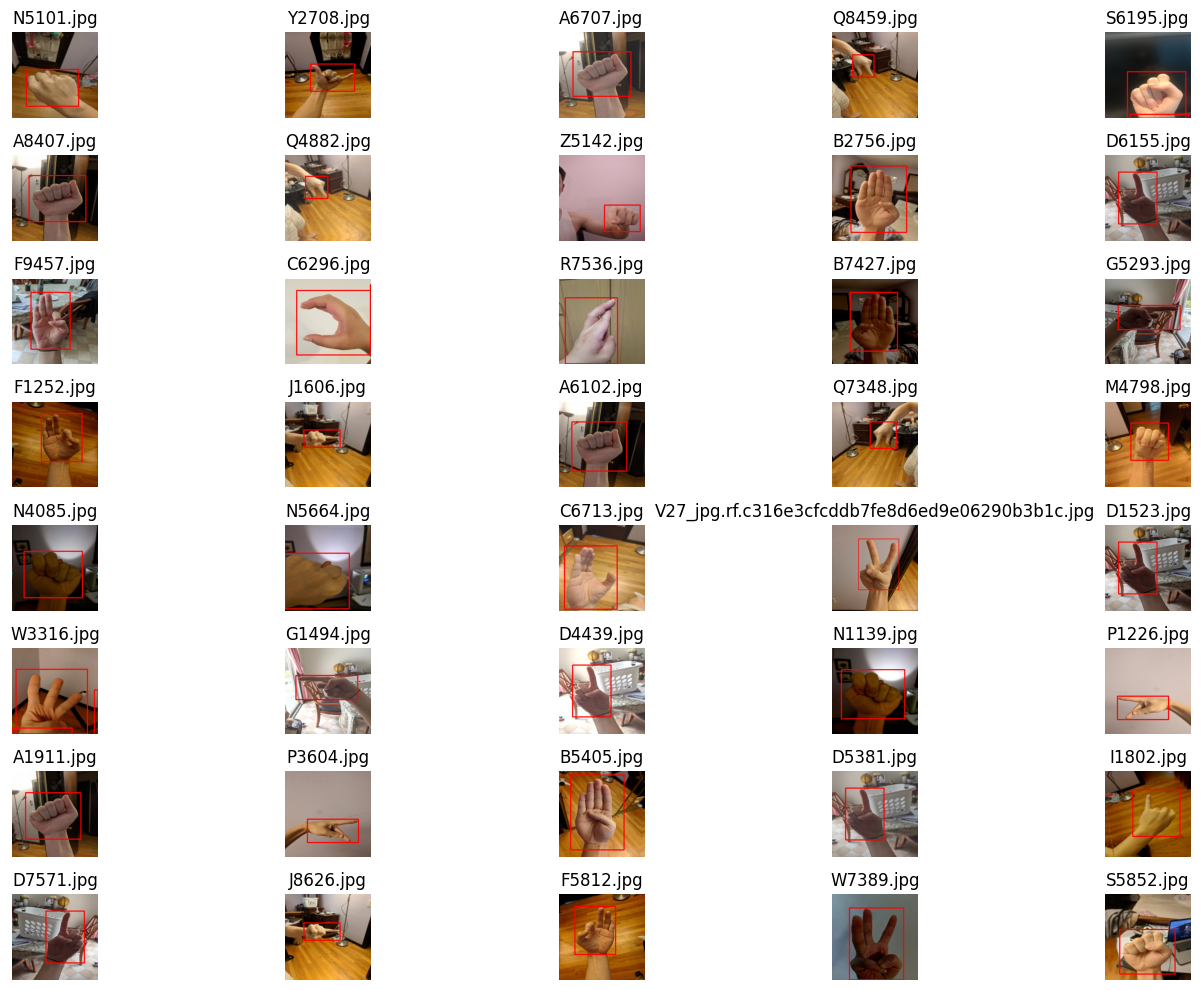

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Rutas de las carpetas
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Función para dibujar bounding boxes
def draw_bounding_boxes(image_path, label_path):
    # Cargar imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer bounding boxes
    with open(label_path, "r") as f:
        bboxes = [list(map(float, line.strip().split())) for line in f]

    # Dibujar cada bounding box
    h, w, _ = image.shape
    for bbox in bboxes:
        x_center, y_center, width, height = bbox[1], bbox[2], bbox[3], bbox[4]

        # Convertir de formato YOLO a coordenadas de píxeles
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        # Dibujar rectángulo
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    return image

# Mostrar algunas imágenes con bounding boxes
sample_images = os.listdir(images_path)[:40]  # Cambia el número para ver más imágenes
plt.figure(figsize=(15, 10))

for i, image_name in enumerate(sample_images):
    if image_name.endswith(".jpg") or image_name.endswith(".png"):
        image_path = os.path.join(images_path, image_name)
        label_path = os.path.join(labels_path, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))

        # Dibujar bounding boxes en la imagen
        image_with_bboxes = draw_bounding_boxes(image_path, label_path)

        # Mostrar imagen
        plt.subplot(8, 5, i + 1)
        plt.imshow(image_with_bboxes)
        plt.title(image_name)
        plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
# Rutas de las carpetas
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"


In [ ]:
cantidad_archivos = len([f for f in os.listdir(images_path) if os.path.isfile(os.path.join(images_path, f))])
cantidad_archivos

1870

In [ ]:
cantidad_archivos = len([f for f in os.listdir(labels_path) if os.path.isfile(os.path.join(labels_path, f))])
cantidad_archivos

1870

In [ ]:
def draw_bounding_boxes(image_path, label_path):
    # Cargar imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer bounding boxes
    bboxes = []
    with open(label_path, "r") as f:
        for line in f:
            elements = list(map(float, line.strip().split()))
            if len(elements) == 5:  # Solo procesar líneas válidas
                class_id, x_center, y_center, width, height = elements
                if all(0 <= val <= 1 for val in [x_center, y_center, width, height]):  # Verificar rango
                    bboxes.append([class_id, x_center, y_center, width, height])
                else:
                    print(f"Warning: Coordenadas fuera de rango en {label_path}: {elements}")

    # Dibujar bounding boxes
    h, w, _ = image.shape
    for bbox in bboxes:
        class_id, x_center, y_center, width, height = bbox

        # Convertir de formato YOLO a píxeles
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        # Dibujar rectángulo
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        cv2.putText(image, f"Class {int(class_id)}", (x_min, y_min - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    return image


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Rutas de las carpetas
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Función para dibujar bounding boxes en una imagen
def draw_bounding_box(image_name, images_dir, labels_dir):
    # Obtener las rutas de la imagen y su archivo de etiquetas
    image_path = os.path.join(images_dir, image_name)
    label_path = os.path.join(labels_dir, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))

    # Verificar si existen los archivos
    if not os.path.exists(image_path):
        print(f"Error: La imagen '{image_name}' no existe en '{images_dir}'.")
        return
    if not os.path.exists(label_path):
        print(f"Error: El archivo de etiquetas para '{image_name}' no existe en '{labels_dir}'.")
        return

    # Cargar imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer bounding boxes
    with open(label_path, "r") as f:
        bboxes = [list(map(float, line.strip().split())) for line in f]

    h, w, _ = image.shape
    for bbox in bboxes:
        if len(bbox) == 5:  # Formato [class_id, x_center, y_center, width, height]
            class_id, x_center, y_center, width, height = bbox

            # Convertir coordenadas YOLO a píxeles
            x_min = int((x_center - width / 2) * w)
            y_min = int((y_center - height / 2) * h)
            x_max = int((x_center + width / 2) * w)
            y_max = int((y_center + height / 2) * h)

            # Dibujar rectángulo y texto
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(image, f"Class {int(class_id)}", (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Mostrar imagen
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f"Bounding Box para {image_name}")
    plt.axis("off")
    plt.show()



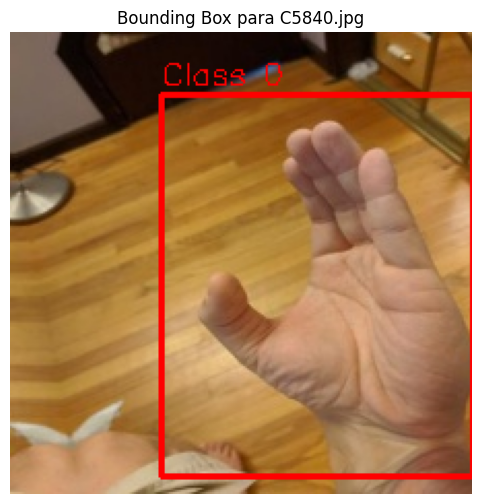

In [ ]:
# Nombre de la imagen que quieres visualizar
image_name = "C5840.jpg"  # Cambia esto por el nombre de tu imagen
draw_bounding_box(image_name, images_path, labels_path)

In [ ]:
# Ruta de los archivos de etiquetas
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Función para validar y corregir coordenadas
def validate_and_fix_labels(labels_dir):
    for label_file in os.listdir(labels_dir):
        if label_file.endswith(".txt"):
            file_path = os.path.join(labels_dir, label_file)
            fixed_lines = []

            with open(file_path, "r") as f:
                for line in f:
                    elements = list(map(float, line.strip().split()))
                    if len(elements) == 5:  # Validar el formato correcto
                        class_id, x_center, y_center, width, height = elements
                        # Corregir valores fuera de rango
                        x_center = min(max(x_center, 0), 1)
                        y_center = min(max(y_center, 0), 1)
                        width = min(max(width, 0), 1)
                        height = min(max(height, 0), 1)
                        fixed_lines.append(f"{int(class_id)} {x_center} {y_center} {width} {height}")
                    else:
                        print(f"Warning: Archivo {label_file} contiene línea inválida: {line.strip()}")

            # Sobrescribir archivo corregido
            with open(file_path, "w") as f:
                for line in fixed_lines:
                    f.write(line + "\n")

            print(f"Corregido: {label_file}")

# Ejecutar la validación y corrección
validate_and_fix_labels(labels_path)


Corregido: W16_jpg.rf.5771e4967321c7e827758319e697bed6.txt
Corregido: S1796.txt
Corregido: F2379.txt
Corregido: X6991.txt
Corregido: H2313.txt
Corregido: N7678.txt
Corregido: G1751.txt
Corregido: N2265.txt
Corregido: X5657.txt
Corregido: J8948.txt
Corregido: K5367.txt
Corregido: V9483.txt
Corregido: I1330.txt
Corregido: U5_jpg.rf.2be92300b664a1946dde8902dc50adbb.txt
Corregido: M1900.txt
Corregido: R6689.txt
Corregido: X4499.txt
Corregido: Q7_jpg.rf.07fdf6c096cd2a9be72b4de4a627935d.txt
Corregido: R1319.txt
Corregido: R8004.txt
Corregido: O3955.txt
Corregido: A4380.txt
Corregido: Q9165.txt
Corregido: N4229.txt
Corregido: Y8138.txt
Corregido: S5590.txt
Corregido: C8471.txt
Corregido: R9689.txt
Corregido: M8774.txt
Corregido: Z8707.txt
Corregido: I1929.txt
Corregido: D4587.txt
Corregido: H8963.txt
Corregido: N2411.txt
Corregido: H5_jpg.rf.f7077ae3eb67ac9f01bd2914625a05b9.txt
Corregido: O3345.txt
Corregido: W3560.txt
Corregido: P8645.txt
Corregido: T5062.txt
Corregido: C2852.txt
Corregido: 

In [ ]:
import os

# Ruta a la carpeta de etiquetas
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Función para buscar archivos con múltiples filas
def find_txt_with_multiple_rows(labels_dir):
    files_with_multiple_rows = []
    for txt_file in os.listdir(labels_dir):
        if txt_file.endswith(".txt"):
            file_path = os.path.join(labels_dir, txt_file)
            with open(file_path, "r") as f:
                lines = f.readlines()
                if len(lines) > 1:  # Verifica si tiene más de una fila
                    files_with_multiple_rows.append((txt_file, len(lines)))
    return files_with_multiple_rows

# Ejecutar la función y mostrar resultados
txt_with_multiple_rows = find_txt_with_multiple_rows(labels_path)

# Mostrar archivos con múltiples filas
if txt_with_multiple_rows:
    print("Archivos .txt con múltiples filas:")
    for file, line_count in txt_with_multiple_rows:
        print(f"{file}: {line_count} filas")
else:
    print("No se encontraron archivos .txt con múltiples filas.")


Archivos .txt con múltiples filas:
W4616.txt: 2 filas
K7029.txt: 3 filas
W8521.txt: 2 filas
R8851.txt: 2 filas
W5396.txt: 2 filas
G9723.txt: 2 filas
N9698.txt: 2 filas
O2806.txt: 2 filas
S4632.txt: 2 filas
W7858.txt: 2 filas
J7874.txt: 2 filas
W7680.txt: 2 filas
C1971.txt: 2 filas
K1401.txt: 2 filas
K1952.txt: 3 filas
N7593.txt: 3 filas
F4626.txt: 2 filas
O7416.txt: 2 filas
W1807.txt: 2 filas
W4334.txt: 2 filas
R2517.txt: 2 filas
N5607.txt: 2 filas
G9991.txt: 2 filas
J2517.txt: 2 filas
G3645.txt: 2 filas
S7570.txt: 2 filas
T7653.txt: 2 filas
W9104.txt: 4 filas
W3118.txt: 2 filas
R4550.txt: 2 filas
C6775.txt: 2 filas
K2360.txt: 2 filas
W5715.txt: 2 filas
C7825.txt: 2 filas
R4534.txt: 3 filas
W3593.txt: 3 filas
W8641.txt: 2 filas
R1904.txt: 3 filas
J8548.txt: 2 filas
B3946.txt: 2 filas
G8497.txt: 2 filas
C5517.txt: 2 filas
S4025.txt: 2 filas
X3948.txt: 3 filas
C6306.txt: 4 filas
H1139.txt: 3 filas
O4951.txt: 2 filas
R4953.txt: 2 filas
C3173.txt: 2 filas
W3868.txt: 2 filas
K5264.txt: 2 fi

In [ ]:
len(txt_with_multiple_rows)

164

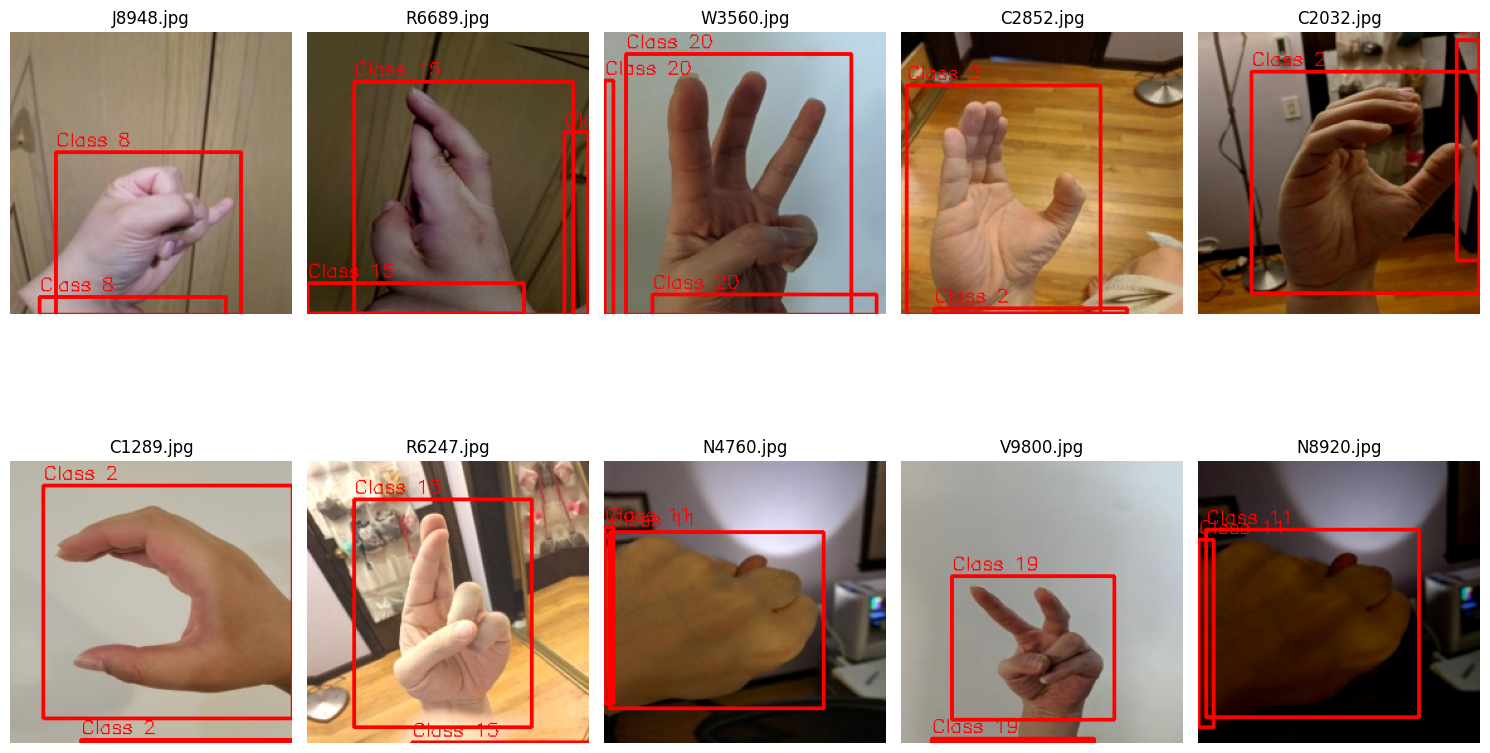

In [ ]:
# Rutas de las carpetas
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Función para obtener archivos con múltiples filas
def find_multiple_row_labels(labels_dir):
    files_with_multiple_rows = []
    for label_file in os.listdir(labels_dir):
        if label_file.endswith(".txt"):
            with open(os.path.join(labels_dir, label_file), "r") as f:
                lines = f.readlines()
                if len(lines) > 1:
                    files_with_multiple_rows.append(label_file)
    return files_with_multiple_rows

# Función para dibujar bounding boxes
def draw_bounding_boxes(image_path, label_path):
    # Cargar imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer bounding boxes
    with open(label_path, "r") as f:
        bboxes = [list(map(float, line.strip().split())) for line in f]

    h, w, _ = image.shape
    for bbox in bboxes:
        if len(bbox) == 5:  # Formato correcto
            class_id, x_center, y_center, width, height = bbox
            # Convertir coordenadas YOLO a píxeles
            x_min = int((x_center - width / 2) * w)
            y_min = int((y_center - height / 2) * h)
            x_max = int((x_center + width / 2) * w)
            y_max = int((y_center + height / 2) * h)
            # Dibujar rectángulo
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(image, f"Class {int(class_id)}", (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)
    return image

# Obtener archivos con más de una fila
multiple_row_files = find_multiple_row_labels(labels_path)

# Graficar imágenes con múltiples bounding boxes
plt.figure(figsize=(15, 10))
for i, label_file in enumerate(multiple_row_files[:10]):  # Muestra las primeras 10 imágenes
    image_file = label_file.replace(".txt", ".jpg")
    image_path = os.path.join(images_path, image_file)
    label_path = os.path.join(labels_path, label_file)

    if os.path.exists(image_path):  # Verificar si la imagen existe
        image_with_bboxes = draw_bounding_boxes(image_path, label_path)
        plt.subplot(2, 5, i + 1)  # 2 filas, 5 columnas
        plt.imshow(image_with_bboxes)
        plt.title(image_file)
        plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
len(multiple_row_files)

171

In [ ]:
# Rutas de las carpetas
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

# Función para dibujar el bounding box sobre la imagen
def draw_bounding_box_for_image(image_name, images_dir, labels_dir):
    # Obtener las rutas de la imagen y su etiqueta
    image_path = os.path.join(images_dir, image_name)
    label_path = os.path.join(labels_dir, image_name.replace(".jpg", ".txt").replace(".png", ".txt"))

    # Verificar si la imagen y el archivo de etiquetas existen
    if not os.path.exists(image_path):
        print(f"Error: La imagen '{image_name}' no existe en '{images_dir}'")
        return
    if not os.path.exists(label_path):
        print(f"Error: El archivo de etiquetas para '{image_name}' no existe en '{labels_dir}'")
        return

    # Cargar la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer y dibujar los bounding boxes
    with open(label_path, "r") as f:
        bboxes = [list(map(float, line.strip().split())) for line in f]

    h, w, _ = image.shape
    for bbox in bboxes:
        if len(bbox) == 5:  # Formato correcto: [class_id, x_center, y_center, width, height]
            class_id, x_center, y_center, width, height = bbox

            # Convertir coordenadas YOLO a píxeles
            x_min = int((x_center - width / 2) * w)
            y_min = int((y_center - height / 2) * h)
            x_max = int((x_center + width / 2) * w)
            y_max = int((y_center + height / 2) * h)

            # Dibujar el bounding box
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
            cv2.putText(image, f"Class {int(class_id)}", (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Mostrar la imagen con bounding boxes
    plt.figure(figsize=(8, 6))
    plt.imshow(image)
    plt.title(f"Bounding Box para {image_name}")
    plt.axis("off")
    plt.show()


In [ ]:
# Nombre de la imagen que quieres visualizar
image_name = "K2456"  # Cambia esto por el nombre de tu imagen
draw_bounding_box_for_image(image_name, images_path, labels_path)

Error: La imagen 'K2456' no existe en '/content/datasets/American-Sign-Language-Letters-1/test/images'


In [ ]:
import shutil
from google.colab import files

# Ruta de la carpeta en Google Colab
carpeta_colab = "/content/datasets"  # Cambia esto por la ruta de tu carpeta

# Nombre del archivo zip que se creará
nombre_zip = "carpeta_descargada.zip"

# Comprimir la carpeta
shutil.make_archive("carpeta_descargada", 'zip', carpeta_colab)

# Descargar el archivo zip
files.download(nombre_zip)


### más pruebas

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, HBox
from IPython.display import display

In [ ]:
# Rutas de las carpetas
images_path = "/content/datasets/American-Sign-Language-Letters-1/test/images"
labels_path = "/content/datasets/American-Sign-Language-Letters-1/test/labels"

In [ ]:
# Colores para los bounding boxes
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]

# Buscar imágenes con más de un bounding box
def find_images_with_multiple_bboxes(labels_dir):
    multiple_bbox_images = []
    for label_file in os.listdir(labels_dir):
        if label_file.endswith(".txt"):
            label_path = os.path.join(labels_dir, label_file)
            with open(label_path, "r") as f:
                lines = f.readlines()
                if len(lines) > 1:  # Más de un bounding box
                    multiple_bbox_images.append(label_file.replace(".txt", ".jpg"))
    return multiple_bbox_images

# Dibujar bounding boxes y seleccionar el correcto
def process_image(image_name):
    image_path = os.path.join(images_path, image_name)
    label_path = os.path.join(labels_path, image_name.replace(".jpg", ".txt"))

    if not os.path.exists(image_path) or not os.path.exists(label_path):
        print(f"Imagen o archivo de etiquetas no encontrado para {image_name}")
        return

    # Cargar la imagen
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer bounding boxes
    with open(label_path, "r") as f:
        bboxes = [list(map(float, line.strip().split())) for line in f]

    # Graficar cada bounding box con un color diferente
    h, w, _ = image.shape
    for i, bbox in enumerate(bboxes):
        if len(bbox) == 5:  # [class_id, x_center, y_center, width, height]
            class_id, x_center, y_center, width, height = bbox
            x_min = int((x_center - width / 2) * w)
            y_min = int((y_center - height / 2) * h)
            x_max = int((x_center + width / 2) * w)
            y_max = int((y_center + width / 2) * h)

            color = colors[i % len(colors)]  # Seleccionar color
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 2)
            cv2.putText(image, f"Box {i+1}", (x_min, y_min - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

    # Mostrar la imagen
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.title(f"Selecciona el bounding box correcto para {image_name}")
    plt.axis("off")
    plt.show()

    # Crear widgets para seleccionar el bounding box correcto
    options = [f"Bounding Box {i+1}" for i in range(len(bboxes))]
    selected_box = widgets.Dropdown(
        options=options,
        description="Correcto:",
        disabled=False
    )
    save_button = widgets.Button(description="Guardar selección")

    # Función para guardar el bounding box seleccionado
    def save_selection(b):
        selected_index = int(selected_box.value.split()[-1]) - 1  # Obtener índice del box
        correct_bbox = bboxes[selected_index]  # Obtener el bounding box correcto

        # Reescribir el archivo original
        with open(label_path, "w") as f:
            f.write(" ".join(map(str, correct_bbox)) + "\n")
        print(f"Bounding box {selected_index + 1} guardado en {label_path}")

    save_button.on_click(save_selection)
    display(selected_box, save_button)

# Lista de imágenes con múltiples bounding boxes
images_with_multiple_bboxes = find_images_with_multiple_bboxes(labels_path)

# Crear interacción para seleccionar la imagen
interact(process_image, image_name=widgets.Dropdown(
    options=images_with_multiple_bboxes,
    description="Imagen:",
    disabled=False
))


interactive(children=(Dropdown(description='Imagen:', options=('K6411.jpg', 'H9286.jpg', 'R5017.jpg', 'W2264.j…

<function __main__.process_image(image_name)>

# **Entrenamiento**

In [41]:
import yaml

# Ruta al archivo data.yaml
yaml_path = '/content/datasets/American-Sign-Language-Letters-1/data.yaml'

# Leer el archivo YAML
with open(yaml_path, 'r') as file:
    data = yaml.safe_load(file)

# Modificar las rutas de las imágenes
data['train'] = '/content/datasets/American-Sign-Language-Letters-1/train/images'
data['val'] = '/content/datasets/American-Sign-Language-Letters-1/valid/images'

# Guardar el archivo YAML actualizado
with open(yaml_path, 'w') as file:
    yaml.dump(data, file)

print("Rutas actualizadas correctamente.")


Rutas actualizadas correctamente.


In [42]:
import os

# Verificar la existencia de las imágenes de entrenamiento
print(os.listdir('/content/datasets/American-Sign-Language-Letters-1/train/images'))

# Verificar la existencia de las imágenes de validación
print(os.listdir('/content/datasets/American-Sign-Language-Letters-1/valid/images'))


['O23_jpg.rf.210f1aaa191497f03d00676460842a64.jpg', 'E14_jpg.rf.7c6faed376e1936c99234c1ff76e4fa2.jpg', 'Z20_jpg.rf.c115813a2f60d4f239546c931101270c.jpg', 'L18_jpg.rf.6f057ffbef34e2b0b5049c635abc87f7.jpg', 'L9_jpg.rf.18fb3c7dce9d787bca991b1a76776261.jpg', 'A6_jpg.rf.37c4f4c6b45868e088a8ac2bc517952a.jpg', 'O1_jpg.rf.d34de0834203ec84df5a6f16981312a8.jpg', 'S1_jpg.rf.f054ea86602eb9790a0b131f502e1ba0.jpg', 'J22_jpg.rf.dd1e7d9beea336be8960e64202f4d41e.jpg', 'X22_jpg.rf.05732e3e92b7d7abbba7c3eb54b022b8.jpg', 'F21_jpg.rf.df6a6428305d0e14e98369fae4813b15.jpg', 'C11_jpg.rf.34fb9796ca851b3ee71f5192d7282bc3.jpg', 'F2_jpg.rf.d32078d29c977657aedfd6795a524a81.jpg', 'R7_jpg.rf.34371b1e19708906fc3eea222974199d.jpg', 'R22_jpg.rf.83015251e51ab253cf59cad62b59384d.jpg', 'V5_jpg.rf.c1dbe0a1d603ddc610659d2bf6f84648.jpg', 'H7_jpg.rf.43f9bd777535c133be749dd7a2a02f94.jpg', 'R9_jpg.rf.2910775cee2e06ac1c54f826e5f75add.jpg', 'J35_jpg.rf.1fc609cff6e57371109b7dd08186c23d.jpg', 'V18_jpg.rf.0a1f6c6de13a46327284a44ca57

In [43]:
%cd {HOME}

/content


In [44]:
%cd {dataset.location}

/content/datasets/American-Sign-Language-Letters-1


## **Entrenamos YOLO11**

In [28]:
!yolo task=detect mode=train model=/content/yolo11l.pt data=/content/datasets/American-Sign-Language-Letters-1/data.yaml epochs=80 imgsz=320

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11l.pt, data=/content/datasets/American-Sign-Language-Letters-1/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, s

## Entrenamos YOLOv11s

In [27]:
model = YOLO("yolo11s.pt")

100%|██████████| 18.4M/18.4M [00:00<00:00, 123MB/s] 


In [45]:
%cd {HOME}

!yolo task=detect mode=train model=/content/yolo11s.pt data=/content/datasets/American-Sign-Language-Letters-1/data.yaml epochs=80 imgsz=320

/content
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11s.pt, data=/content/datasets/American-Sign-Language-Letters-1/data.yaml, epochs=80, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop

# **Resultados en train y valid**

## Pérdidas durante el entrenamiento

In [26]:
# Rutas a los archivos de resultados (resultados.csv generados durante el entrenamiento)
results_l_path = '/content/run-yolo11l/detect/train/results.csv'  # YOLO11l
results_s_path = '/content/run-yolo11s/detect/train/results.csv'  # YOLO11s

Columns in results_l: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Columns in results_s: Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


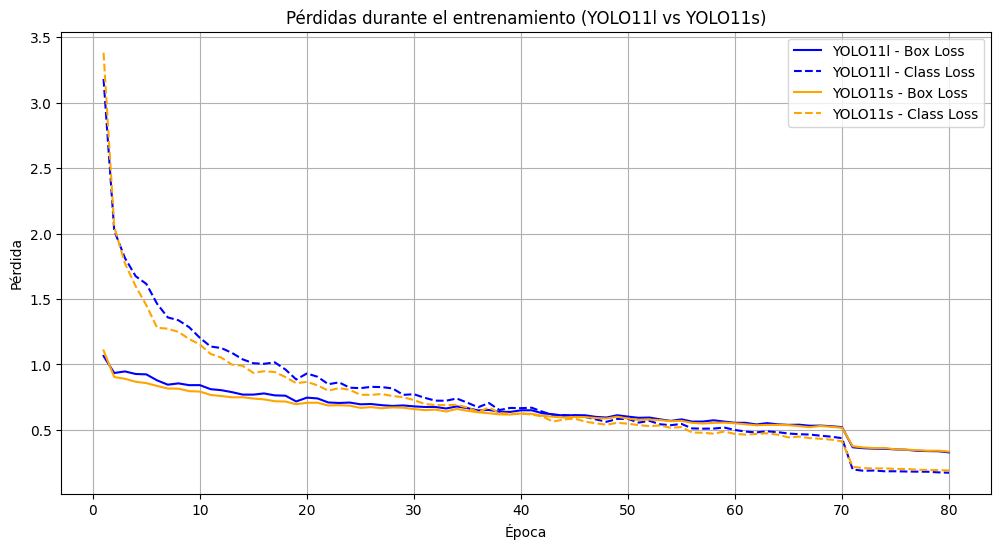

In [28]:
# Cargar datos
results_l = pd.read_csv(results_l_path)
results_s = pd.read_csv(results_s_path)

# Print the column names to check if 'box_loss' exists and inspect
print("Columns in results_l:", results_l.columns)
print("Columns in results_s:", results_s.columns)

# If 'box_loss' is not present, try using 'train/box_loss' instead:
# Assuming the column is named 'train/box_loss'
plt.figure(figsize=(12, 6))
plt.plot(results_l['epoch'], results_l['train/box_loss'], label='YOLO11l - Box Loss', linestyle='-', color='blue')
plt.plot(results_l['epoch'], results_l['train/cls_loss'], label='YOLO11l - Class Loss', linestyle='--', color='blue')
plt.plot(results_s['epoch'], results_s['train/box_loss'], label='YOLO11s - Box Loss', linestyle='-', color='orange')
plt.plot(results_s['epoch'], results_s['train/cls_loss'], label='YOLO11s - Class Loss', linestyle='--', color='orange')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdidas durante el entrenamiento (YOLO11l vs YOLO11s)')
plt.legend()
plt.grid()
plt.show()

## Matriz de confusión




**YOLO11l**

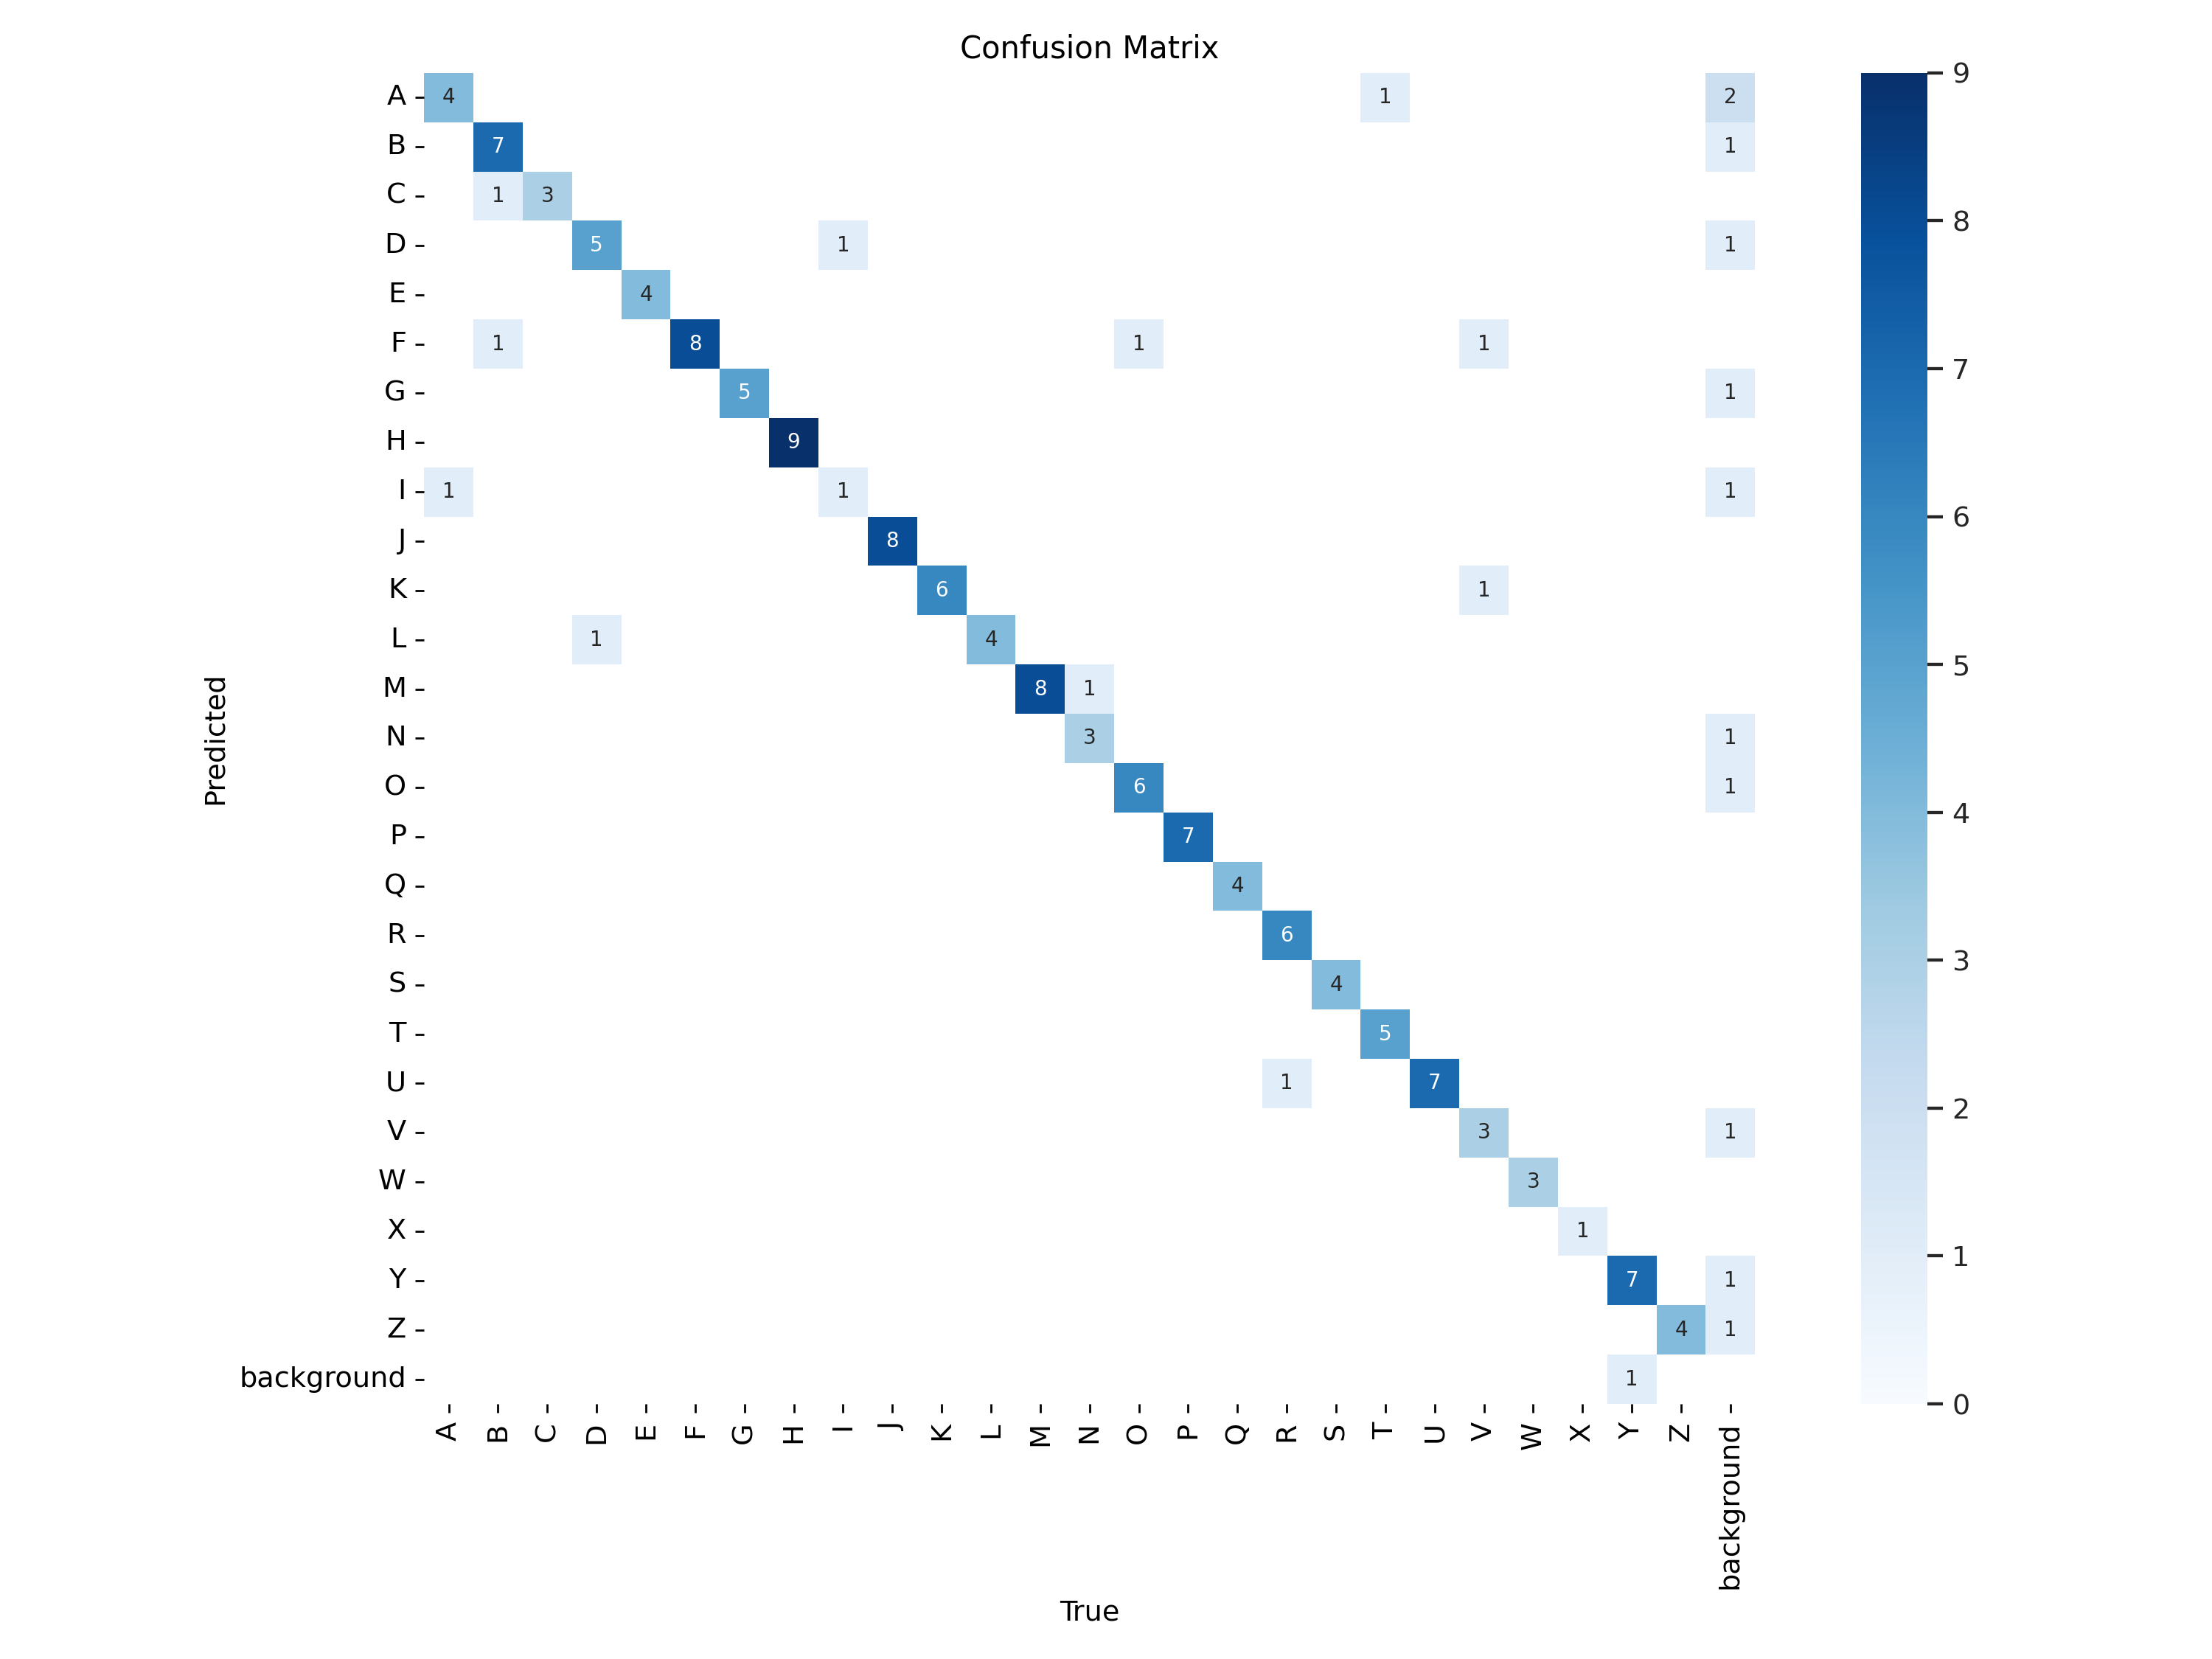

In [30]:
Image(filename='/content/run-yolo11l/detect/train/confusion_matrix.png', width=900)

**YOLO11s**

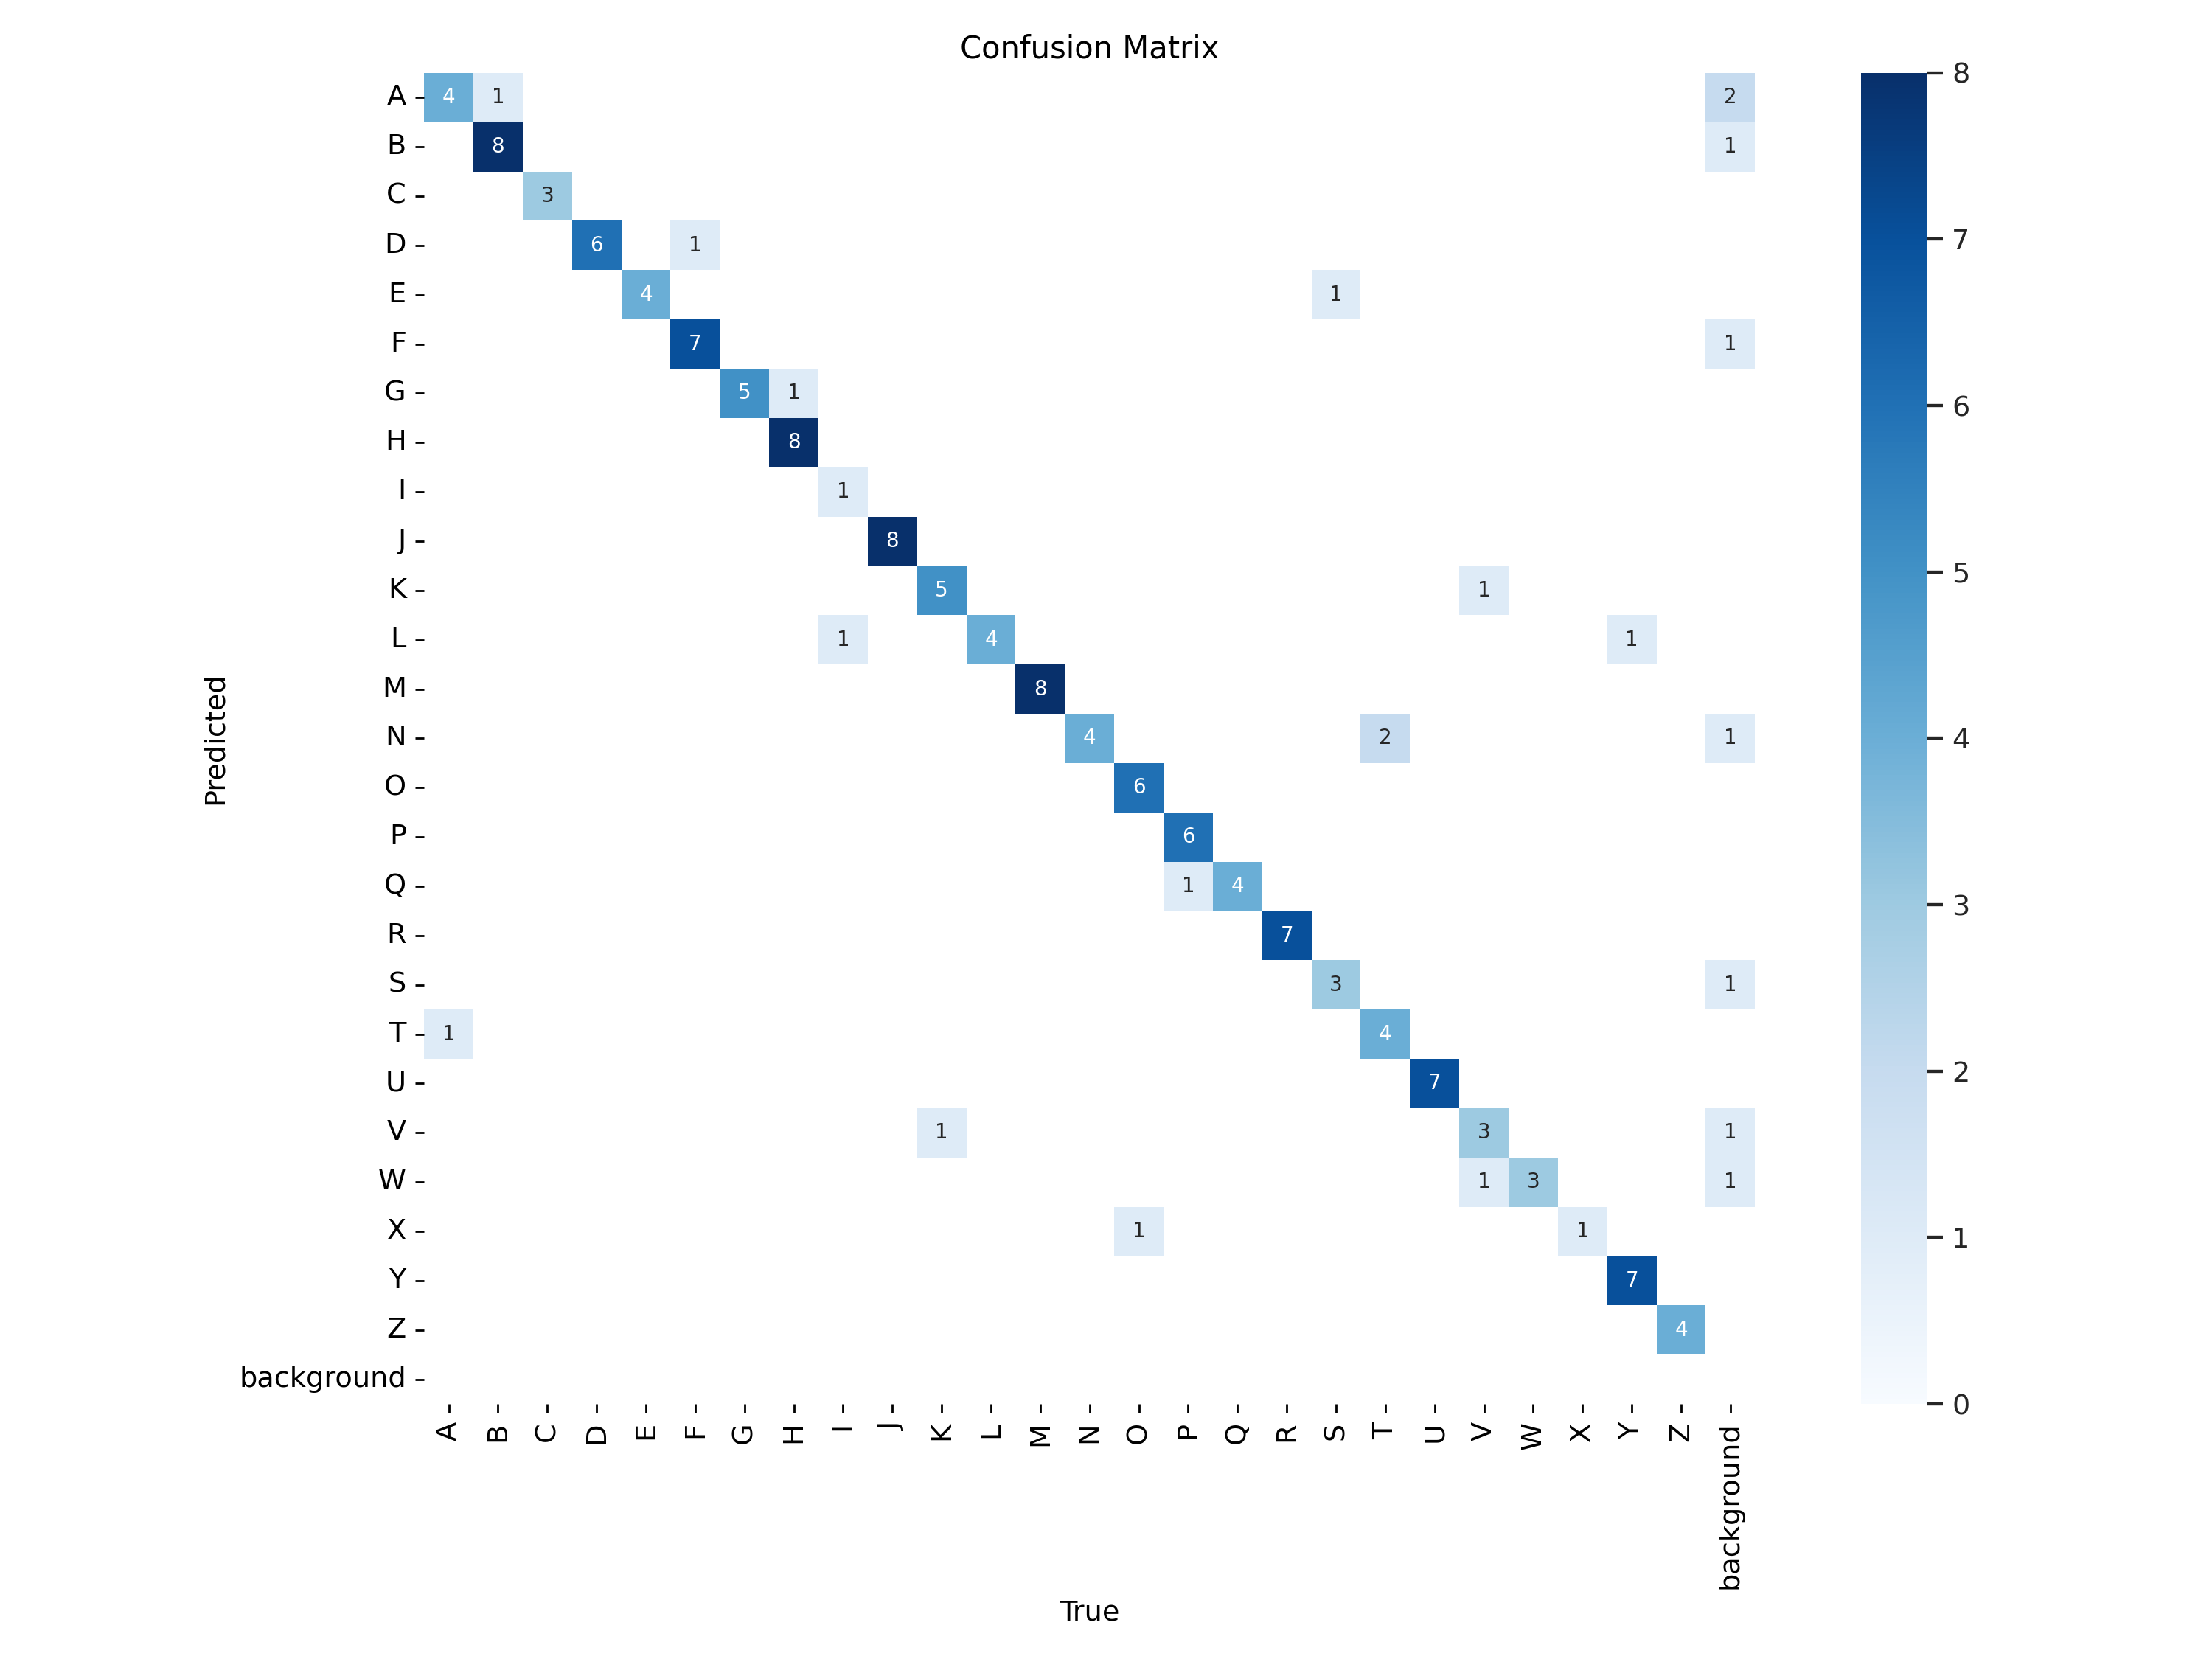

In [31]:
Image(filename='/content/run-yolo11s/detect/train/confusion_matrix.png', width=900)

## Training and Validation Loss

**YOLO11l**

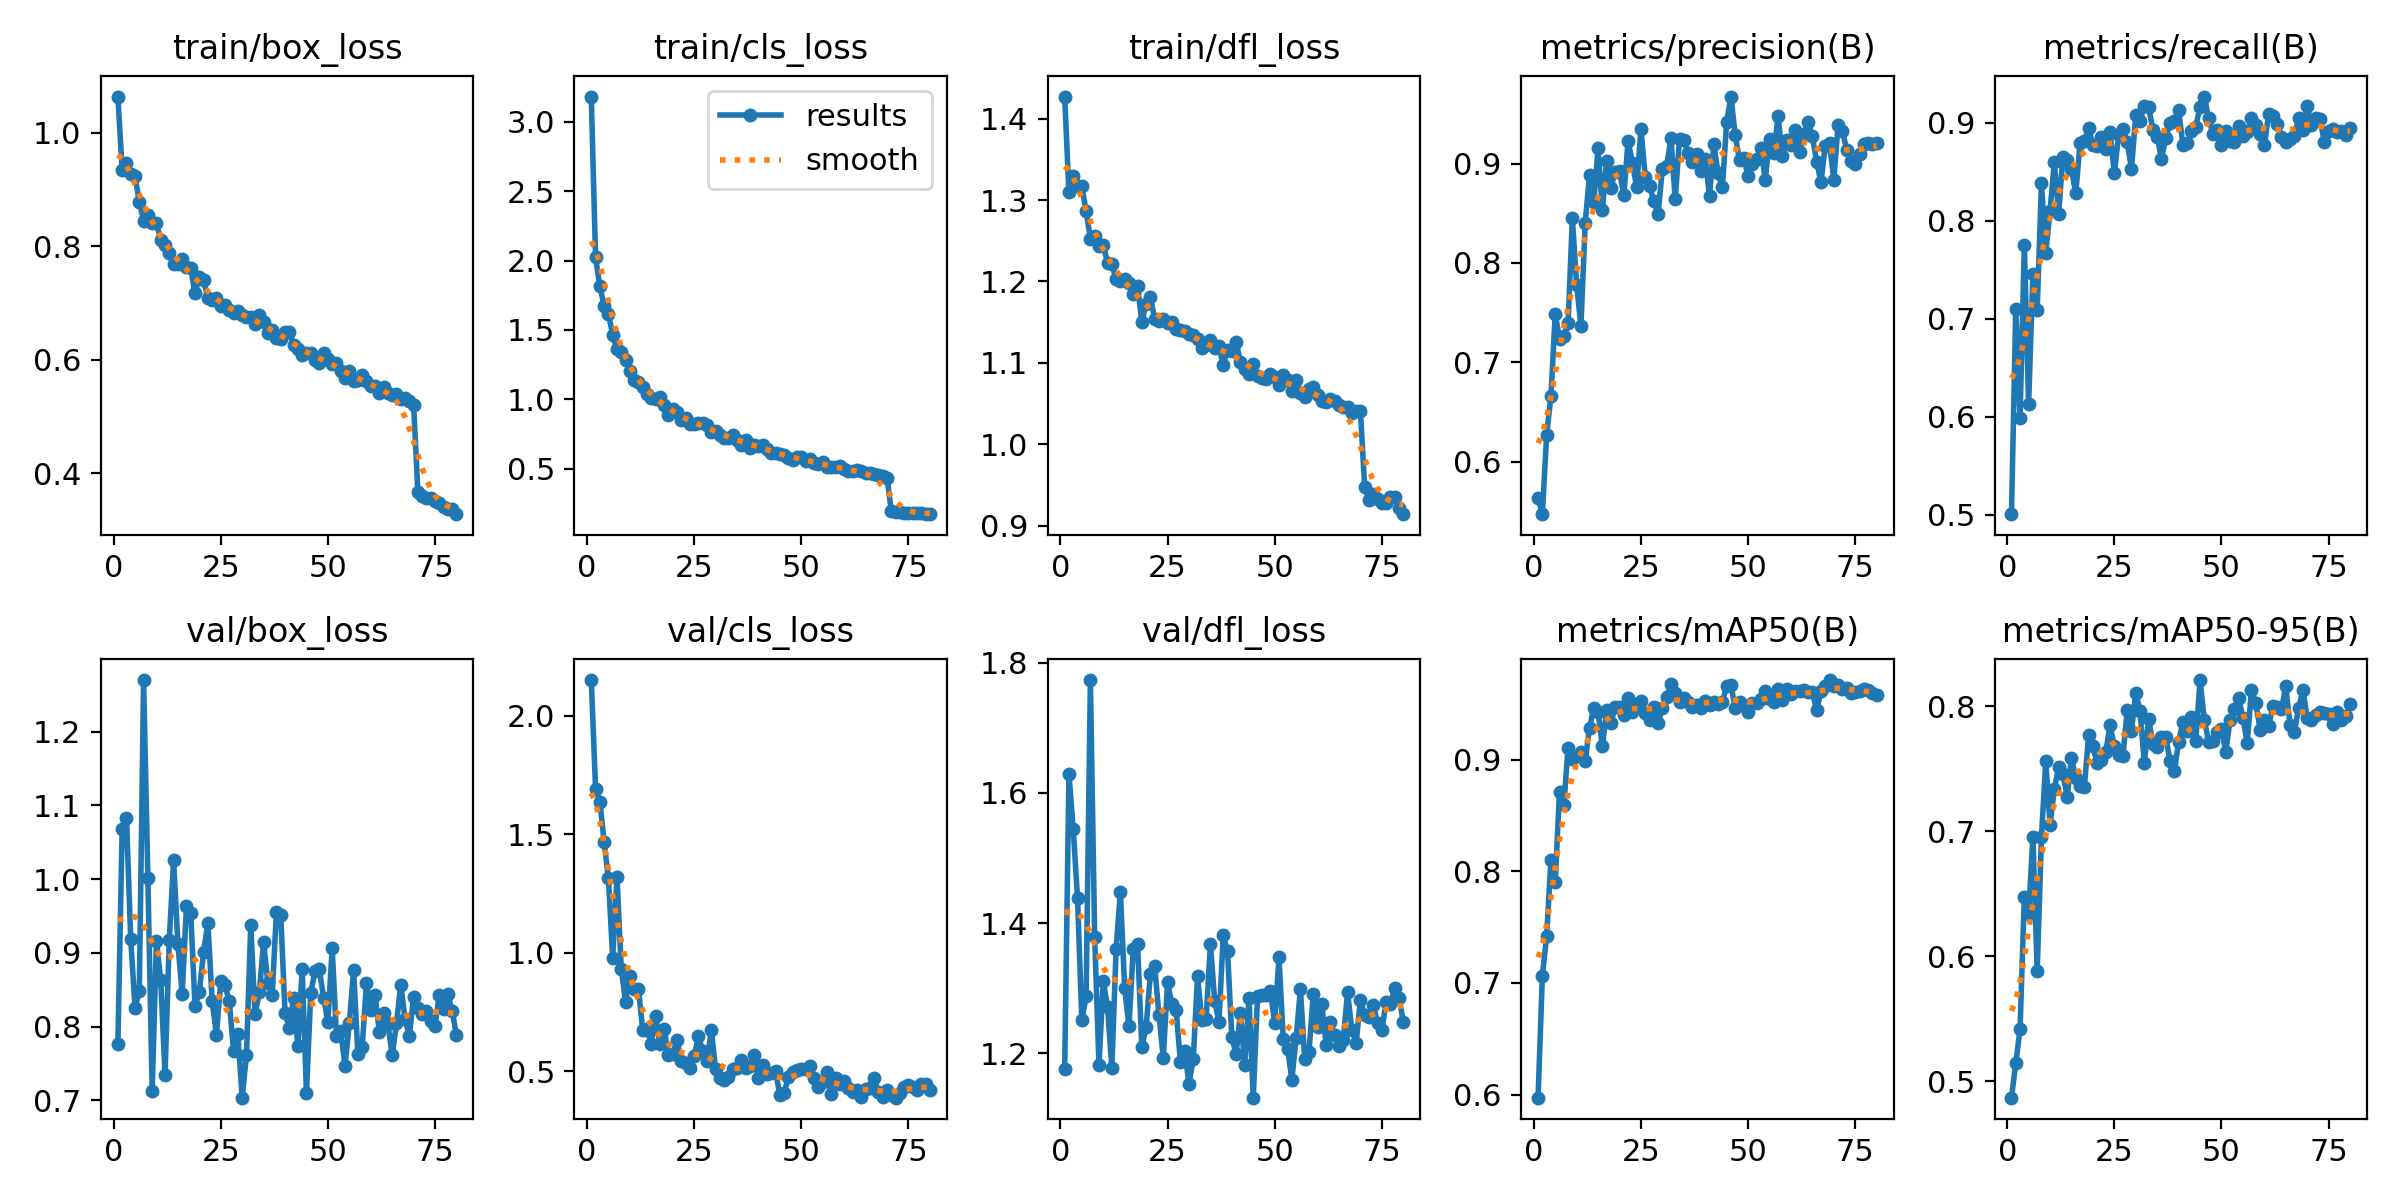

In [36]:
Image(filename='/content/run-yolo11l/detect/train/results.png', width=600)

**YOLO11s**

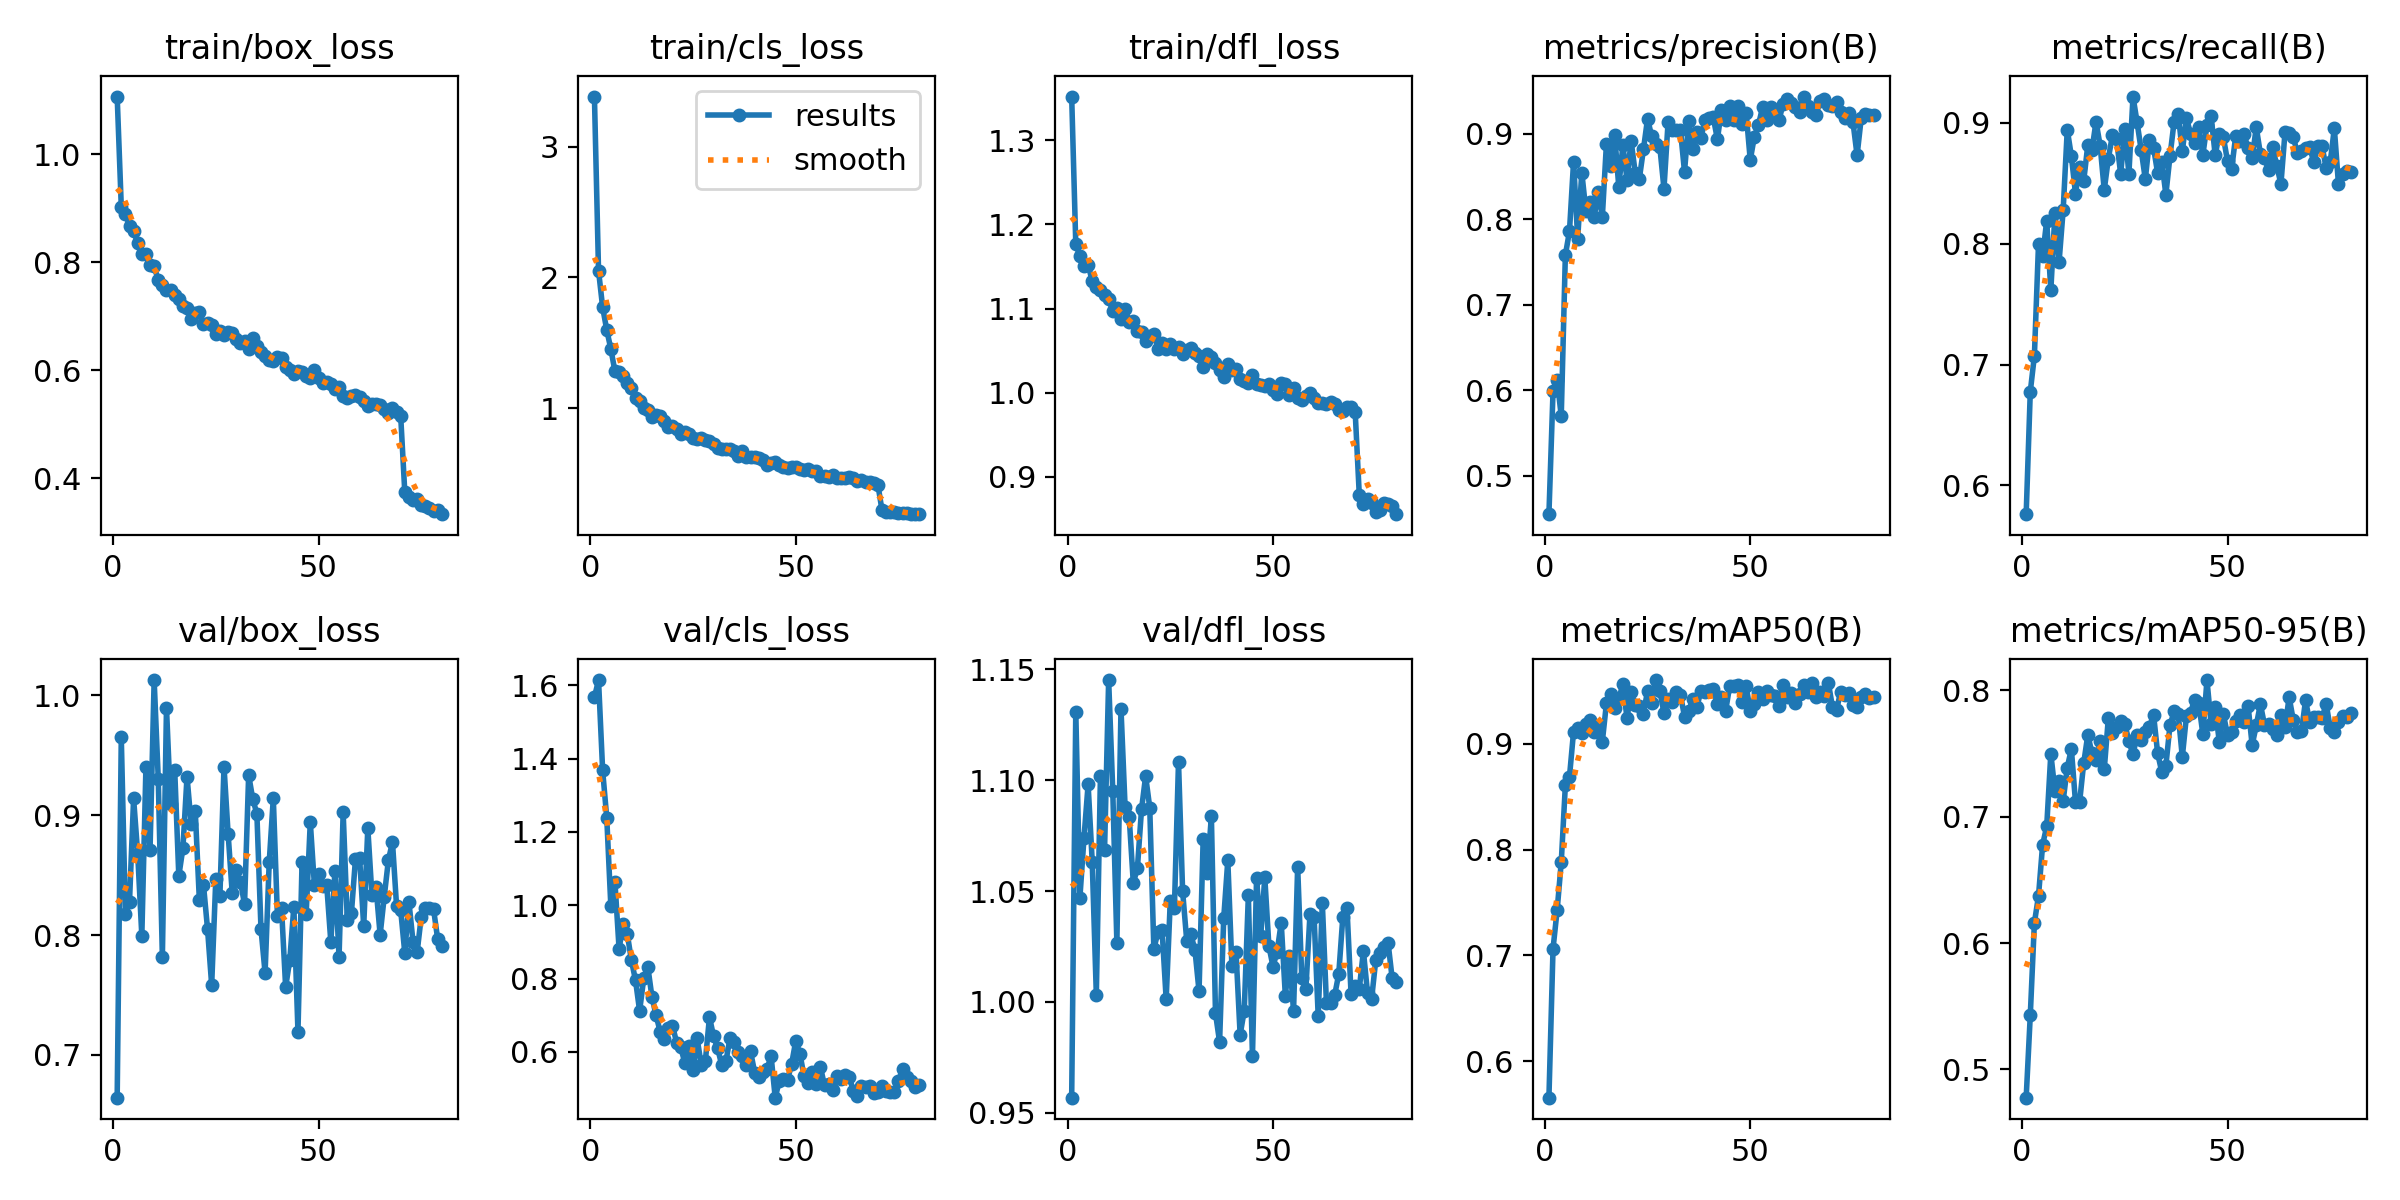

In [37]:
Image(filename='/content/run-yolo11s/detect/train/results.png', width=600)

## Imágenes para un batch de validación

**YOLO11l**

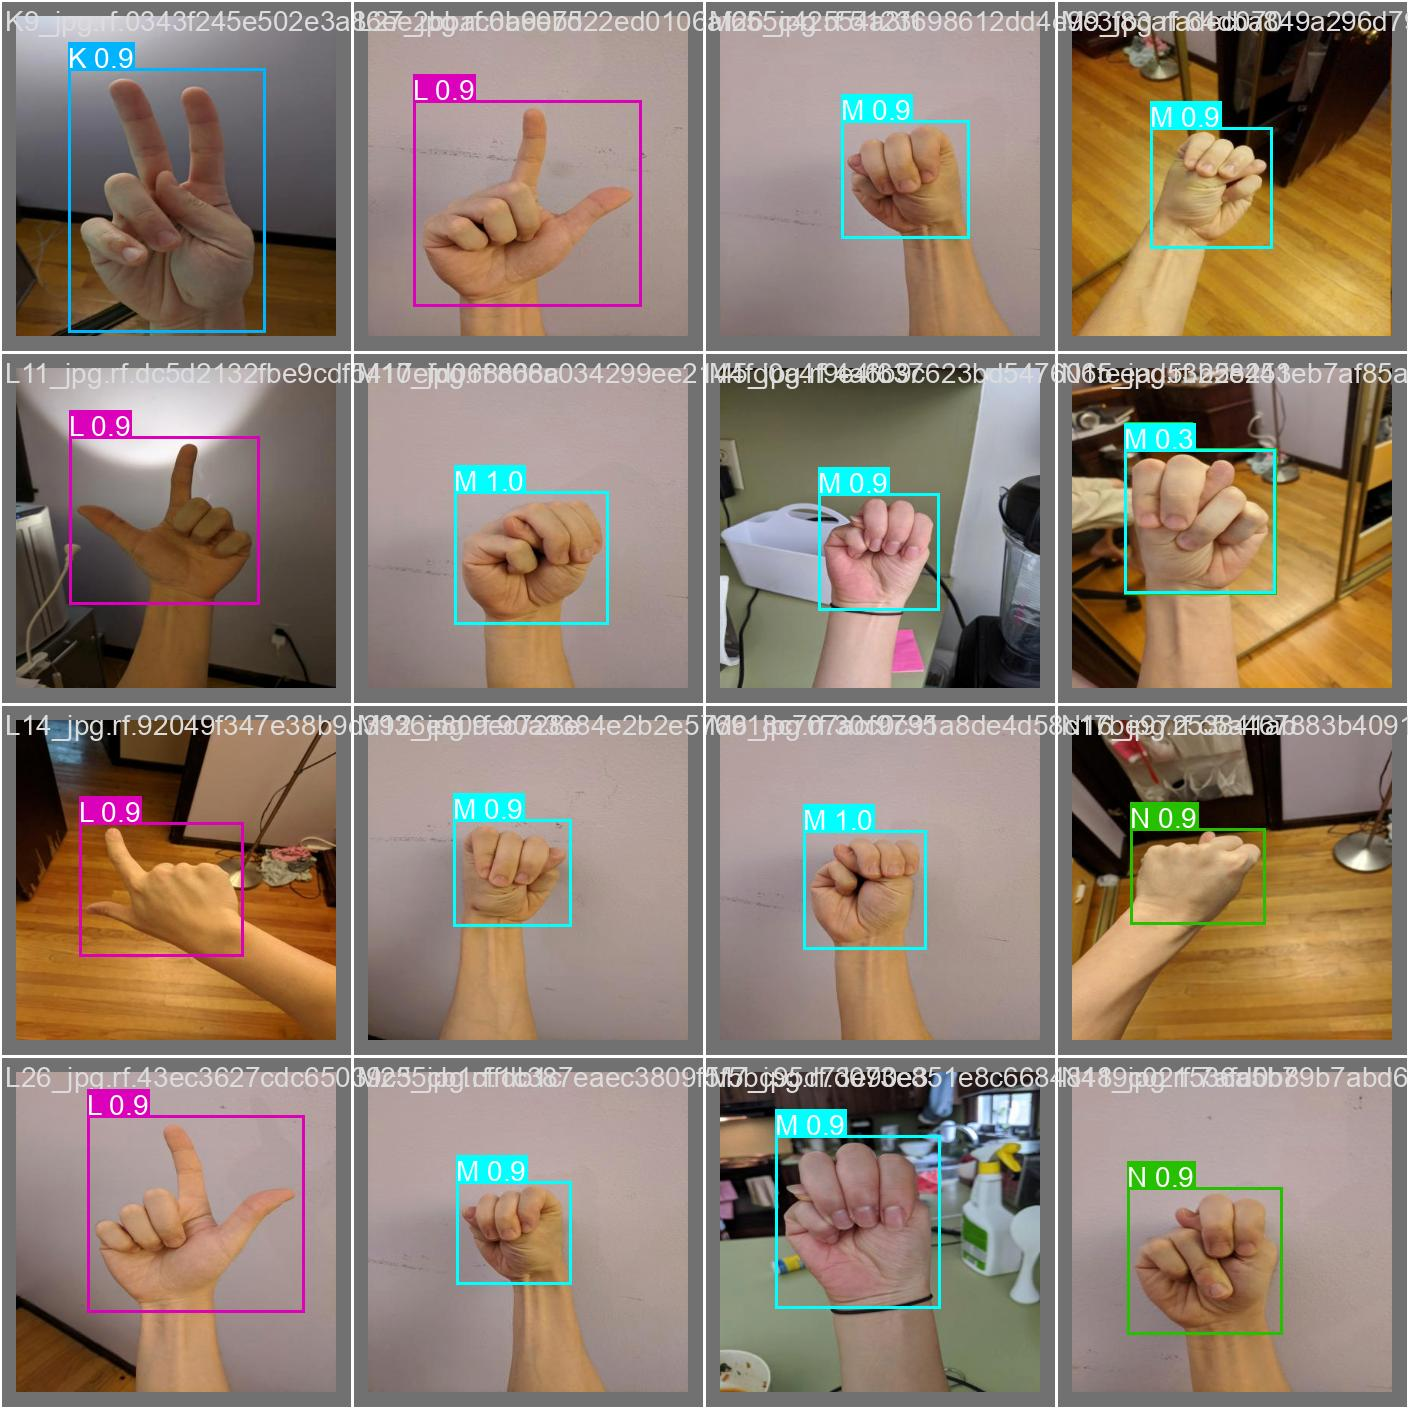

In [39]:
Image(filename='/content/run-yolo11l/detect/train/val_batch2_pred.jpg', width=600)

**YOLO11s**

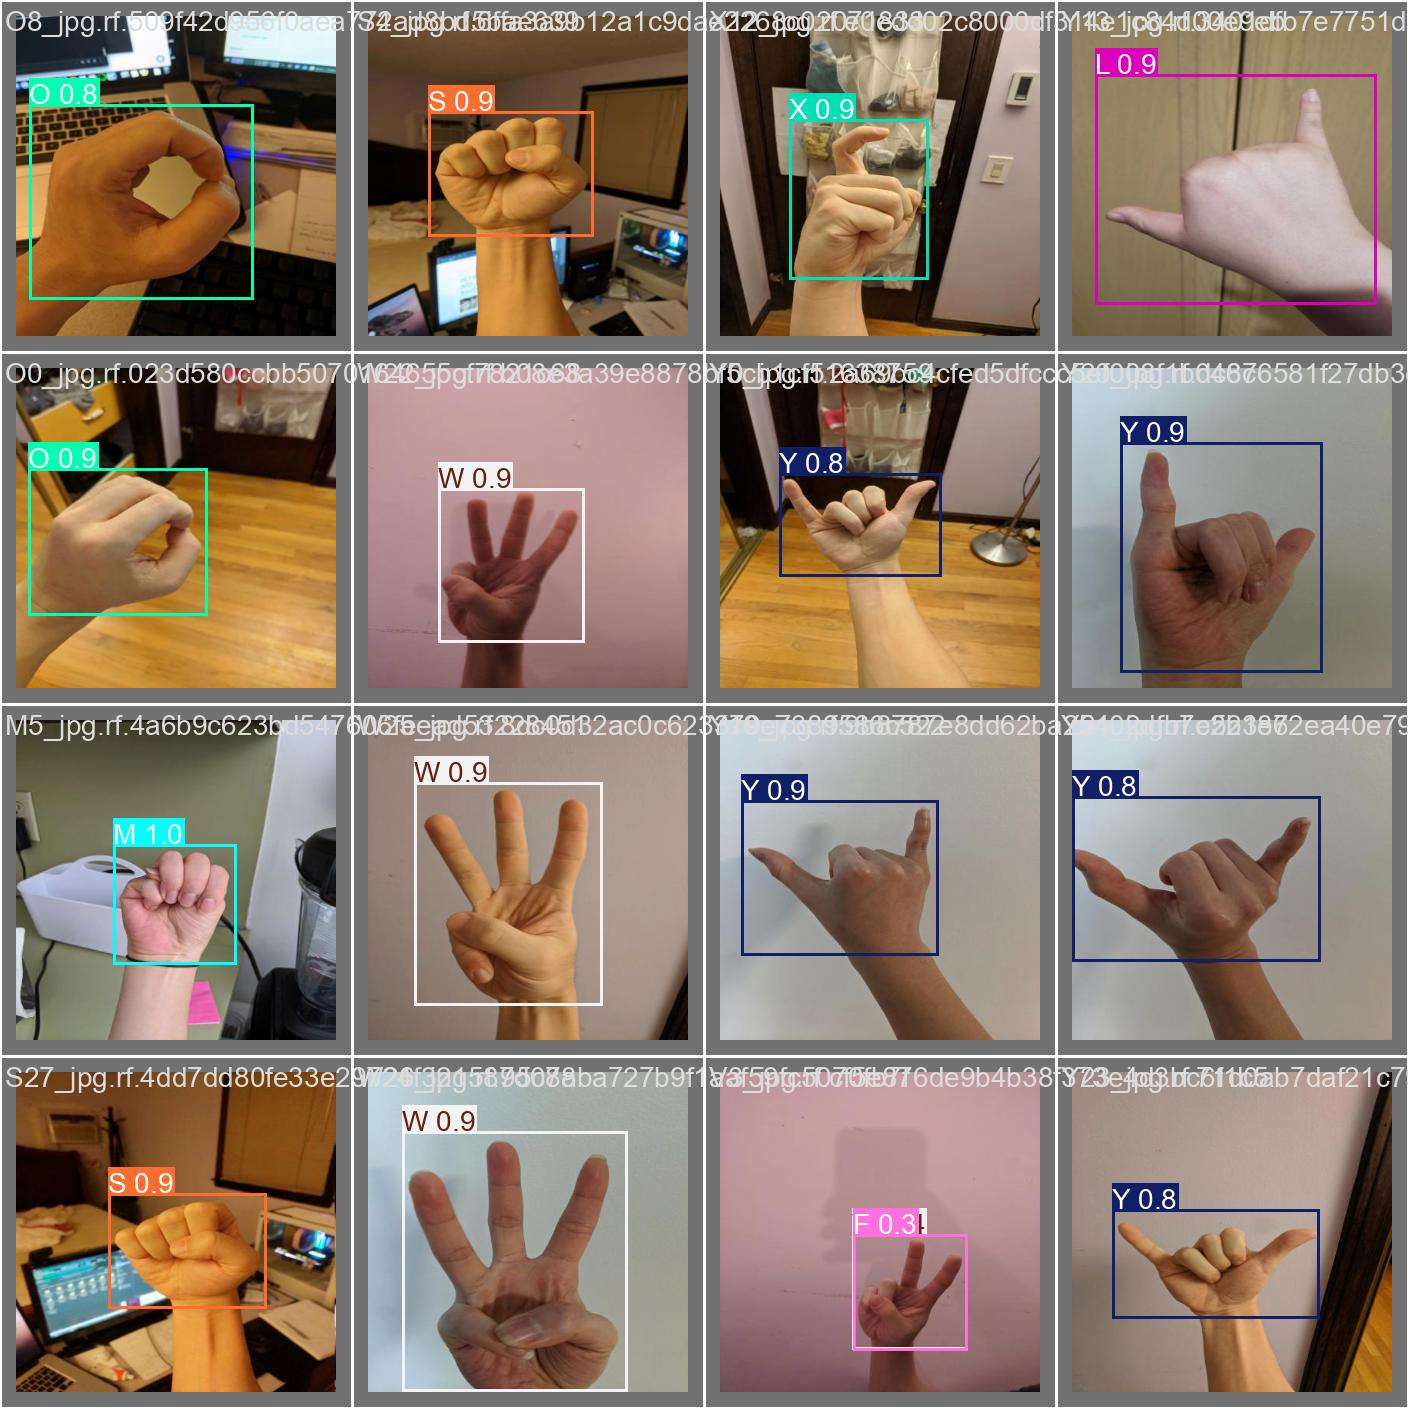

In [41]:
Image(filename='/content/run-yolo11s/detect/train/val_batch1_pred.jpg', width=600)

# **Test**

**YOLO11l**

In [32]:
from ultralytics import YOLO

In [37]:
# Cargar el modelo con los pesos entrenados
model = YOLO('/content/run-yolo11l/detect/train/weights/best.pt')  # Cambia la ruta según corresponda

# Evaluar en el conjunto de test con un IoU personalizado
results = model.val(data='/content/datasets/American-Sign-Language-Letters-1/data.yaml', split='test', iou=0.5)  # iou=0.5 es un ejemplo


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11l summary (fused): 464 layers, 25,299,358 parameters, 0 gradients, 86.7 GFLOPs


val: Scanning /content/datasets/American-Sign-Language-Letters-1/test/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [01:14<00:00, 14.89s/it]


                   all         72         72      0.913      0.912      0.956      0.798
                     A          1          1      0.476          1      0.995      0.995
                     B          3          3      0.945          1      0.995      0.895
                     C          4          4      0.934          1      0.995      0.883
                     D          1          1      0.896          1      0.995      0.895
                     F          2          2      0.794          1      0.995      0.895
                     G          5          5          1      0.853      0.995      0.779
                     H          3          3      0.732          1       0.83        0.7
                     I          2          2      0.877        0.5      0.512      0.461
                     J          4          4      0.962          1      0.995      0.769
                     K          4          4       0.95          1      0.995       0.87
                     

In [39]:
# Mostrar métricas principales
print("Resultados en el conjunto de test:")
print(f"Precisión (P): {results.box.map50:.2f}")
print(f"Recall (R): {results.box.map:.2f}")
print(f"mAP@50: {results.box.map50:.2f}")
print(f"mAP@50-95: {results.box.map:.2f}")

Resultados en el conjunto de test:
Precisión (P): 0.96
Recall (R): 0.80
mAP@50: 0.96
mAP@50-95: 0.80


In [43]:
# Descargamos la carpeta run generada con los datos de test
import shutil
from google.colab import files

# Ruta de la carpeta en Google Colab
carpeta_colab = "/content/run"  # Cambia esto por la ruta de tu carpeta

# Nombre del archivo zip que se creará
nombre_zip = "run_test.zip"

# Comprimir la carpeta
shutil.make_archive("run_test", 'zip', carpeta_colab)

# Descargar el archivo zip
files.download(nombre_zip)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**YOLO11s**

In [40]:
# Cargar el modelo con los pesos entrenados
model2 = YOLO('/content/run-yolo11s/detect/train/weights/best.pt')

# Evaluar en el conjunto de test con un IoU personalizado
results2 = model2.val(data='/content/datasets/American-Sign-Language-Letters-1/data.yaml', split='test', iou=0.5)


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLO11s summary (fused): 238 layers, 9,422,862 parameters, 0 gradients, 21.4 GFLOPs


val: Scanning /content/datasets/American-Sign-Language-Letters-1/test/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.01s/it]


                   all         72         72      0.914       0.88      0.955      0.804
                     A          1          1      0.848          1      0.995      0.895
                     B          3          3      0.984          1      0.995      0.853
                     C          4          4      0.924          1      0.995      0.873
                     D          1          1        0.5          1      0.995      0.895
                     F          2          2      0.977          1      0.995      0.897
                     G          5          5      0.969        0.8      0.938      0.731
                     H          3          3      0.703      0.814      0.913      0.798
                     I          2          2       0.81        0.5      0.503      0.503
                     J          4          4      0.958          1      0.995      0.535
                     K          4          4          1      0.551      0.912      0.798
                     

In [42]:
# Mostrar métricas principales
print("Resultados en el conjunto de test:")
print(f"Precisión (P): {results2.box.map50:.2f}")
print(f"Recall (R): {results2.box.map:.2f}")  # Changed to results.box.map
print(f"mAP@50: {results2.box.map50:.2f}")
print(f"mAP@50-95: {results2.box.map:.2f}")  # Changed to results.box.map

Resultados en el conjunto de test:
Precisión (P): 0.96
Recall (R): 0.80
mAP@50: 0.96
mAP@50-95: 0.80
